In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

import statsmodels
import statsmodels.api as sm

from sklearn import svm
from sklearn.svm import SVC, LinearSVC

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.metrics import roc_curve, auc , f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score 
from xgboost import XGBClassifier
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_curve
from sklearn.feature_selection import RFE

from warnings import filterwarnings
filterwarnings('ignore')



In [2]:
# %cd C:\Users\Msc 1\Documents\prj

## **Importing the Beneficiary, Inpatient and Outpatient Dataset**

In [3]:
df_inpatient=pd.read_csv(r"/kaggle/input/healthcare-provider-fraud-detection-analysis/Train_Inpatientdata-1542865627584.csv")

In [4]:
df_outpatient=pd.read_csv(r"/kaggle/input/healthcare-provider-fraud-detection-analysis/Train_Outpatientdata-1542865627584.csv")

In [5]:
df_beneficiary=pd.read_csv(r"/kaggle/input/healthcare-provider-fraud-detection-analysis/Train_Beneficiarydata-1542865627584.csv")

In [6]:
df_train=pd.read_csv(r"/kaggle/input/healthcare-provider-fraud-detection-analysis/Train-1542865627584.csv")

In [7]:
df_train['PotentialFraud']=pd.get_dummies(df_train['PotentialFraud'],drop_first=True)

In [8]:
df_inpatient.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6'],
      dtype='object')

In [9]:
df_outpatient.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
      dtype='object')

In [10]:
df_beneficiary.columns

Index(['BeneID', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt'],
      dtype='object')

In [11]:
df_inpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BeneID                  40474 non-null  object 
 1   ClaimID                 40474 non-null  object 
 2   ClaimStartDt            40474 non-null  object 
 3   ClaimEndDt              40474 non-null  object 
 4   Provider                40474 non-null  object 
 5   InscClaimAmtReimbursed  40474 non-null  int64  
 6   AttendingPhysician      40362 non-null  object 
 7   OperatingPhysician      23830 non-null  object 
 8   OtherPhysician          4690 non-null   object 
 9   AdmissionDt             40474 non-null  object 
 10  ClmAdmitDiagnosisCode   40474 non-null  object 
 11  DeductibleAmtPaid       39575 non-null  float64
 12  DischargeDt             40474 non-null  object 
 13  DiagnosisGroupCode      40474 non-null  object 
 14  ClmDiagnosisCode_1      40474 non-null

In [12]:
df_outpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517737 entries, 0 to 517736
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BeneID                  517737 non-null  object 
 1   ClaimID                 517737 non-null  object 
 2   ClaimStartDt            517737 non-null  object 
 3   ClaimEndDt              517737 non-null  object 
 4   Provider                517737 non-null  object 
 5   InscClaimAmtReimbursed  517737 non-null  int64  
 6   AttendingPhysician      516341 non-null  object 
 7   OperatingPhysician      90617 non-null   object 
 8   OtherPhysician          195046 non-null  object 
 9   ClmDiagnosisCode_1      507284 non-null  object 
 10  ClmDiagnosisCode_2      322357 non-null  object 
 11  ClmDiagnosisCode_3      203257 non-null  object 
 12  ClmDiagnosisCode_4      125596 non-null  object 
 13  ClmDiagnosisCode_5      74344 non-null   object 
 14  ClmDiagnosisCode_6  

In [13]:
df_beneficiary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   BeneID                           138556 non-null  object
 1   DOB                              138556 non-null  object
 2   DOD                              1421 non-null    object
 3   Gender                           138556 non-null  int64 
 4   Race                             138556 non-null  int64 
 5   RenalDiseaseIndicator            138556 non-null  object
 6   State                            138556 non-null  int64 
 7   County                           138556 non-null  int64 
 8   NoOfMonths_PartACov              138556 non-null  int64 
 9   NoOfMonths_PartBCov              138556 non-null  int64 
 10  ChronicCond_Alzheimer            138556 non-null  int64 
 11  ChronicCond_Heartfailure         138556 non-null  int64 
 12  ChronicCond_Kidn

In [14]:
df_inpatient.shape

(40474, 30)

In [15]:
df_outpatient.shape

(517737, 27)

In [16]:
df_beneficiary.shape

(138556, 25)

## **Merging the Datasets**

In [17]:
df_IO = pd.merge(df_inpatient, df_outpatient, left_on = [x for x in df_outpatient.columns if x in df_inpatient.columns], 
                 right_on = [x for x in df_outpatient.columns if x in df_inpatient.columns], how = 'outer')



In [18]:
df_IO.head(10)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN
5,BENE11017,CLM70950,2009-10-06,2009-10-12,PRV54986,8000,PHY402711,PHY402711,PHY402711,2009-10-06,...,2948,25000,25002,NaN,863.0,NaN,NaN,NaN,NaN,NaN
6,BENE11018,CLM32075,2009-01-02,2009-01-07,PRV54090,8000,PHY412314,PHY347494,NaN,2009-01-02,...,2948,2809,56210,NaN,4576.0,NaN,NaN,NaN,NaN,NaN
7,BENE11028,CLM62376,2009-08-03,2009-08-07,PRV51148,6000,PHY346286,PHY405514,NaN,2009-08-03,...,2851,4439,41401,NaN,9904.0,NaN,NaN,NaN,NaN,NaN
8,BENE11031,CLM62784,2009-08-06,2009-08-09,PRV55839,7000,PHY385030,NaN,NaN,2009-08-06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,BENE11034,CLM31519,2008-12-29,2009-01-05,PRV55215,29000,PHY355604,PHY415867,NaN,2008-12-29,...,4019,4111,4589,NaN,3612.0,4139.0,NaN,NaN,NaN,NaN


In [19]:
print('Train_Allpatientdata',df_IO.shape)

Train_Allpatientdata (558211, 30)


In [20]:
df_beneficiary['DOB'] = pd.to_datetime(df_beneficiary['DOB'] , format = '%Y-%m-%d')
df_beneficiary['DOD'] = pd.to_datetime(df_beneficiary['DOD'],format = '%Y-%m-%d',errors='ignore')
df_beneficiary['Age'] = round(((df_beneficiary['DOD'] - df_beneficiary['DOB']).dt.days)/365)

In [21]:
## As we see that last DOD value is 2009-12-01 ,which means Beneficiary Details data is of year 2009.
## so we will calculate age of other benficiaries for year 2009.

df_beneficiary.Age.fillna(round(((pd.to_datetime('2009-12-01' , format = '%Y-%m-%d') - df_beneficiary['DOB']).dt.days)/365),
                                 inplace=True)

In [22]:
## merge All patient data with beneficiary details data based on 'BeneID' as joining key for inner join
df_BIO = pd.merge(df_IO,df_beneficiary,left_on='BeneID',right_on='BeneID',how='inner')

In [23]:
df_BIO.head(10)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,1,1,2,1,1,36000,3204,60,70,67.0
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,1,1,2,1,1,36000,3204,60,70,67.0
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,1,1,2,1,1,36000,3204,60,70,67.0
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,1,2,2,1,1,5000,1068,250,320,96.0
4,BENE11011,CLM144521,2009-01-18,2009-01-18,PRV52314,50,PHY379398,NaN,NaN,NaN,...,1,2,2,1,1,5000,1068,250,320,96.0
5,BENE11011,CLM347780,2009-05-08,2009-05-08,PRV51012,50,PHY429635,NaN,PHY322331,NaN,...,1,2,2,1,1,5000,1068,250,320,96.0
6,BENE11011,CLM507201,2009-08-04,2009-08-04,PRV51063,80,PHY345842,NaN,NaN,NaN,...,1,2,2,1,1,5000,1068,250,320,96.0
7,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,2,1,2,2,2,21260,2136,120,100,72.0
8,BENE11014,CLM523157,2009-08-13,2009-08-13,PRV56835,60,PHY373512,NaN,PHY373512,NaN,...,2,1,2,2,2,21260,2136,120,100,72.0
9,BENE11017,CLM70950,2009-10-06,2009-10-12,PRV54986,8000,PHY402711,PHY402711,PHY402711,2009-10-06,...,1,1,2,1,1,22000,2136,1400,840,70.0


In [24]:
# Merge patient data with fradulent providers details data with "Provider" as joining key for inner join

df_BIOP=pd.merge(df_BIO,df_train,how='inner',on='Provider')

## **Final Merged Dataset - df_BIOP**

In [25]:
df_BIOP.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,PotentialFraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,1,2,1,1,36000,3204,60,70,67.0,1
1,BENE16973,CLM565430,2009-09-06,2009-09-06,PRV55912,50,PHY365867,PHY327147,NaN,NaN,...,1,2,2,2,24000,2136,450,200,78.0,1
2,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,...,1,2,2,2,19000,1068,100,20,96.0,1
3,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,NaN,2009-10-17,...,1,1,2,2,17000,1068,1050,540,87.0,1
4,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,2009-10-25,...,1,1,1,2,27000,2136,450,160,79.0,1


In [26]:
# Hence, df_BIOP is the proper dataset. Target variable is 'PotentialFraud. all other variables are independent variable

## **Outlier Analysis and Treatment**

In [27]:
df_BIOP['RenalDiseaseIndicator'].value_counts()

0    448363
Y    109848
Name: RenalDiseaseIndicator, dtype: int64

In [28]:
# Replacing the Y as 1 in the RenalDiseaseIndicator column

df_BIOP['RenalDiseaseIndicator']=df_BIOP['RenalDiseaseIndicator'].replace({'Y':1,'0':0})

In [29]:
df_BIOP['RenalDiseaseIndicator'].value_counts()

0    448363
1    109848
Name: RenalDiseaseIndicator, dtype: int64

In [30]:
df_BIOP['RenalDiseaseIndicator']=df_BIOP['RenalDiseaseIndicator'].astype('int')

In [31]:
df_BIOP['PotentialFraud']=df_BIOP['PotentialFraud'].astype('int')

In [32]:
df_BIOP.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558211 entries, 0 to 558210
Data columns (total 56 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   BeneID                           558211 non-null  object        
 1   ClaimID                          558211 non-null  object        
 2   ClaimStartDt                     558211 non-null  object        
 3   ClaimEndDt                       558211 non-null  object        
 4   Provider                         558211 non-null  object        
 5   InscClaimAmtReimbursed           558211 non-null  int64         
 6   AttendingPhysician               556703 non-null  object        
 7   OperatingPhysician               114447 non-null  object        
 8   OtherPhysician                   199736 non-null  object        
 9   AdmissionDt                      40474 non-null   object        
 10  ClmAdmitDiagnosisCode            145899 non-

In [33]:
df_BIOP_number=df_BIOP.select_dtypes(include=[np.number])

In [34]:
df_BIOP_cat=df_BIOP.select_dtypes(include=[object])

In [35]:
df_BIOP_cat.shape

(558211, 22)

In [36]:
df_BIOP_number.shape

(558211, 32)

**Removing Outliers using IQR Method**

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(1, 0, 'InscClaimAmtReimbursed'),
  Text(2, 0, 'DeductibleAmtPaid'),
  Text(3, 0, 'ClmProcedureCode_1'),
  Text(4, 0, 'ClmProcedureCode_2'),
  Text(5, 0, 'ClmProcedureCode_3'),
  Text(6, 0, 'ClmProcedureCode_4'),
  Text(7, 0, 'ClmProcedureCode_5'),
  Text(8, 0, 'ClmProcedureCode_6'),
  Text(9, 0, 'Gender'),
  Text(10, 0, 'Race'),
  Text(11, 0, 'RenalDiseaseIndicator'),
  Text(12, 0, 'State'),
  Text(13, 0, 'County'),
  Text(14, 0, 'NoOfMonths_PartACov'),
  Text(15, 0, 'NoOfMonths_PartBCov'),
  Text(16, 0, 'ChronicCond_Alzheimer'),
  Text(17, 0, 'ChronicCond_Heartfailure'),
  Text(18, 0, 'ChronicCond_KidneyDisease'),
  Text(19, 0, 'ChronicCond_Cancer'),
  Text(20, 0, 'ChronicCond_ObstrPulmonary'),
  Text(21, 0, 'ChronicCond_Depression'),
  Text(22, 0, 'ChronicCond_Diabetes'),
  Text(23, 0, 'ChronicCond_IschemicHeart'),
  Text(24, 0, 'Chr

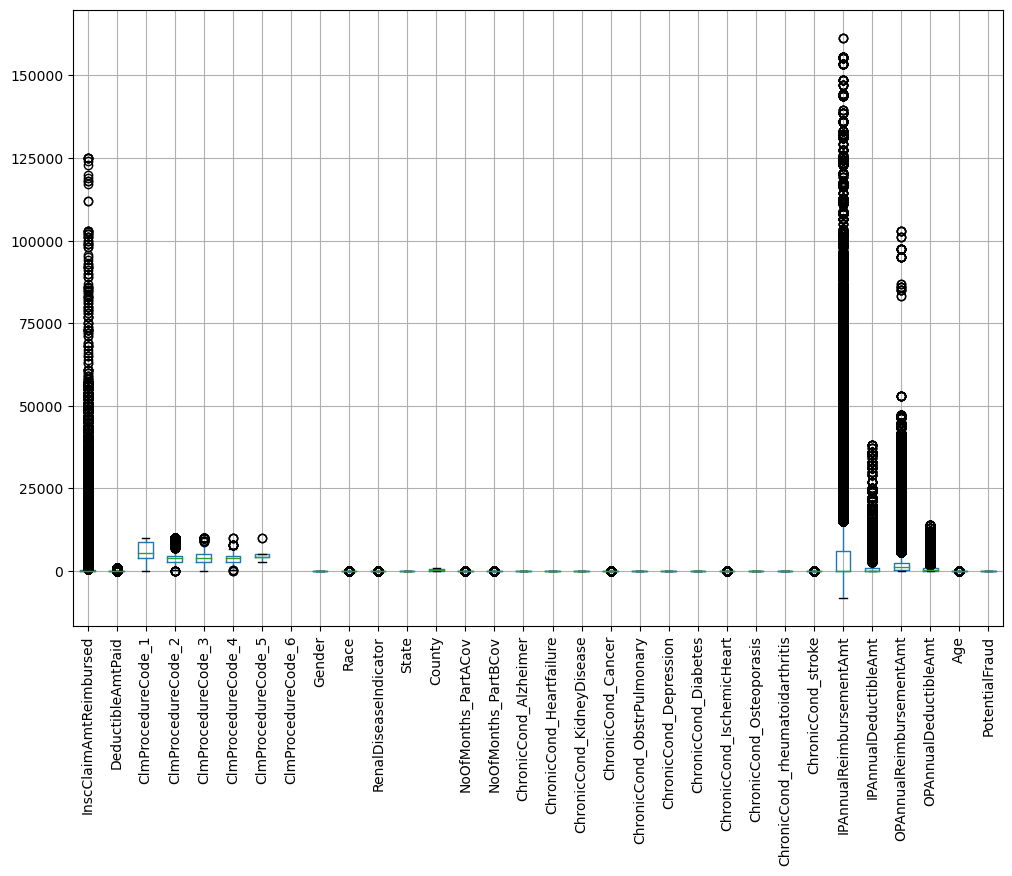

In [37]:
plt.figure(figsize=(12,8))
df_BIOP_number.boxplot()
plt.xticks(rotation=90)

<AxesSubplot:xlabel='IPAnnualReimbursementAmt', ylabel='Density'>

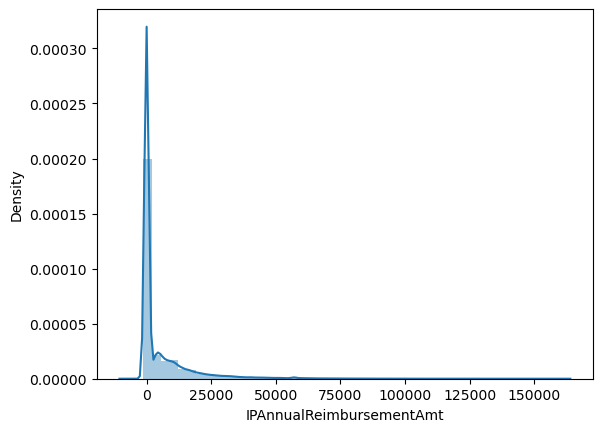

In [38]:
sns.distplot(df_BIOP_number['IPAnnualReimbursementAmt'])

In [39]:
q1=df_BIOP_number.quantile(0.25)
q3=df_BIOP_number.quantile(0.75)

IQR= q3-q1

LL=q1-1.5*IQR
UL=q3+1.5*IQR

len(df_BIOP_number['IPAnnualReimbursementAmt'][df_BIOP_number['IPAnnualReimbursementAmt']>UL.IPAnnualReimbursementAmt])/len(df_BIOP_number['IPAnnualReimbursementAmt'])*100
df_BIOP_number = df_BIOP_number.reset_index(drop = True)

In [40]:
df_BIOP_number.head()

,InscClaimAmtReimbursed,DeductibleAmtPaid,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Gender,Race,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,PotentialFraud
0,26000,1068.0,NaN,NaN,NaN,NaN,NaN,NaN,1,1,...,1,2,1,1,36000,3204,60,70,67.0,1
1,50,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1,1,...,1,2,2,2,24000,2136,450,200,78.0,1
2,19000,1068.0,7769.0,5849.0,NaN,NaN,NaN,NaN,2,1,...,1,2,2,2,19000,1068,100,20,96.0,1
3,17000,1068.0,9338.0,NaN,NaN,NaN,NaN,NaN,1,1,...,1,1,2,2,17000,1068,1050,540,87.0,1
4,13000,1068.0,8154.0,NaN,NaN,NaN,NaN,NaN,2,1,...,1,1,1,2,27000,2136,450,160,79.0,1


## **Algorithmic approach for Treating Missing Values using mean**

In [41]:
(df_BIOP_number.isnull().sum()/len(df_BIOP))*100

InscClaimAmtReimbursed               0.000000
DeductibleAmtPaid                    0.161050
ClmProcedureCode_1                  95.824160
ClmProcedureCode_2                  99.016501
ClmProcedureCode_3                  99.826410
ClmProcedureCode_4                  99.978861
ClmProcedureCode_5                  99.998388
ClmProcedureCode_6                 100.000000
Gender                               0.000000
Race                                 0.000000
RenalDiseaseIndicator                0.000000
State                                0.000000
County                               0.000000
NoOfMonths_PartACov                  0.000000
NoOfMonths_PartBCov                  0.000000
ChronicCond_Alzheimer                0.000000
ChronicCond_Heartfailure             0.000000
ChronicCond_KidneyDisease            0.000000
ChronicCond_Cancer                   0.000000
ChronicCond_ObstrPulmonary           0.000000
ChronicCond_Depression               0.000000
ChronicCond_Diabetes              

In [42]:
df_BIOP_number.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558211 entries, 0 to 558210
Data columns (total 32 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   InscClaimAmtReimbursed           558211 non-null  int64  
 1   DeductibleAmtPaid                557312 non-null  float64
 2   ClmProcedureCode_1               23310 non-null   float64
 3   ClmProcedureCode_2               5490 non-null    float64
 4   ClmProcedureCode_3               969 non-null     float64
 5   ClmProcedureCode_4               118 non-null     float64
 6   ClmProcedureCode_5               9 non-null       float64
 7   ClmProcedureCode_6               0 non-null       float64
 8   Gender                           558211 non-null  int64  
 9   Race                             558211 non-null  int64  
 10  RenalDiseaseIndicator            558211 non-null  int64  
 11  State                            558211 non-null  int64  
 12  Co

In [43]:
df_BIOP_number.drop(['ClmProcedureCode_1','ClmProcedureCode_2','ClmProcedureCode_3','ClmProcedureCode_4','ClmProcedureCode_5','ClmProcedureCode_6'],axis=1,inplace=True)

In [44]:
df_BIOP.drop(['ClmProcedureCode_1','ClmProcedureCode_2','ClmProcedureCode_3','ClmProcedureCode_4','ClmProcedureCode_5','ClmProcedureCode_6'],axis=1,inplace=True)

In [45]:
df_BIOP_number.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558211 entries, 0 to 558210
Data columns (total 26 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   InscClaimAmtReimbursed           558211 non-null  int64  
 1   DeductibleAmtPaid                557312 non-null  float64
 2   Gender                           558211 non-null  int64  
 3   Race                             558211 non-null  int64  
 4   RenalDiseaseIndicator            558211 non-null  int64  
 5   State                            558211 non-null  int64  
 6   County                           558211 non-null  int64  
 7   NoOfMonths_PartACov              558211 non-null  int64  
 8   NoOfMonths_PartBCov              558211 non-null  int64  
 9   ChronicCond_Alzheimer            558211 non-null  int64  
 10  ChronicCond_Heartfailure         558211 non-null  int64  
 11  ChronicCond_KidneyDisease        558211 non-null  int64  
 12  Ch

In [46]:
(df_BIOP_cat.isnull().sum()/len(df_BIOP_cat))*100

BeneID                    0.000000
ClaimID                   0.000000
ClaimStartDt              0.000000
ClaimEndDt                0.000000
Provider                  0.000000
AttendingPhysician        0.270149
OperatingPhysician       79.497538
OtherPhysician           64.218548
AdmissionDt              92.749337
ClmAdmitDiagnosisCode    73.863109
DischargeDt              92.749337
DiagnosisGroupCode       92.749337
ClmDiagnosisCode_1        1.872589
ClmDiagnosisCode_2       35.041588
ClmDiagnosisCode_3       56.458221
ClmDiagnosisCode_4       70.524407
ClmDiagnosisCode_5       79.949517
ClmDiagnosisCode_6       84.881702
ClmDiagnosisCode_7       88.144805
ClmDiagnosisCode_8       90.425843
ClmDiagnosisCode_9       92.509105
ClmDiagnosisCode_10      99.102490
dtype: float64

In [47]:
df_BIOP_cat.drop(['AdmissionDt','DischargeDt','DiagnosisGroupCode','ClmDiagnosisCode_6','ClmDiagnosisCode_7','ClmDiagnosisCode_8','ClmDiagnosisCode_9','ClmDiagnosisCode_10'],axis=1,inplace=True)

In [48]:
 df_BIOP.drop(['DOD','AdmissionDt','DischargeDt','DiagnosisGroupCode','ClmDiagnosisCode_6','ClmDiagnosisCode_7','ClmDiagnosisCode_8','ClmDiagnosisCode_9','ClmDiagnosisCode_10'],axis=1,inplace=True)

In [49]:
(df_BIOP_cat.isnull().sum()/len(df_BIOP_cat))*100

BeneID                    0.000000
ClaimID                   0.000000
ClaimStartDt              0.000000
ClaimEndDt                0.000000
Provider                  0.000000
AttendingPhysician        0.270149
OperatingPhysician       79.497538
OtherPhysician           64.218548
ClmAdmitDiagnosisCode    73.863109
ClmDiagnosisCode_1        1.872589
ClmDiagnosisCode_2       35.041588
ClmDiagnosisCode_3       56.458221
ClmDiagnosisCode_4       70.524407
ClmDiagnosisCode_5       79.949517
dtype: float64

In [50]:
df_BIOP_cat['OperatingPhysician'].value_counts()

PHY330576    424
PHY424897    293
PHY314027    256
PHY423534    250
PHY357120    249
            ... 
PHY395438      1
PHY386083      1
PHY337007      1
PHY422184      1
PHY349201      1
Name: OperatingPhysician, Length: 35315, dtype: int64

In [51]:
df_BIOP_cat['OperatingPhysician']=df_BIOP_cat['OperatingPhysician'].replace(np.nan,'PHY330576')

In [52]:
df_BIOP_cat['AttendingPhysician'].value_counts()

PHY330576    2534
PHY350277    1628
PHY412132    1321
PHY423534    1223
PHY314027    1200
             ... 
PHY385307       1
PHY321355       1
PHY388480       1
PHY399383       1
PHY392440       1
Name: AttendingPhysician, Length: 82063, dtype: int64

In [53]:
df_BIOP_cat['AttendingPhysician']=df_BIOP_cat['AttendingPhysician'].replace(np.nan,'PHY330576')

In [54]:
df_BIOP_cat['OtherPhysician'].value_counts()

PHY412132    1247
PHY341578    1098
PHY338032    1070
PHY337425    1041
PHY347064     806
             ... 
PHY412508       1
PHY383667       1
PHY374914       1
PHY373092       1
PHY392440       1
Name: OtherPhysician, Length: 46457, dtype: int64

In [55]:
df_BIOP_cat['OtherPhysician']=df_BIOP_cat['OtherPhysician'].replace(np.nan,'PHY412132')

In [56]:
df_BIOP_cat['ClmAdmitDiagnosisCode'].value_counts()

V7612    4074
42731    3634
78605    2992
4019     2732
25000    2368
         ... 
7385        1
3841        1
71993       1
32726       1
20228       1
Name: ClmAdmitDiagnosisCode, Length: 4098, dtype: int64

In [57]:
df_BIOP_cat['ClmAdmitDiagnosisCode']=df_BIOP_cat['ClmAdmitDiagnosisCode'].replace(np.nan,'V7612')

In [58]:
df_BIOP_cat['ClmDiagnosisCode_1'].value_counts()

4019     13886
4011     12512
2724      3606
2720      3210
2722      3028
         ...  
36423        1
01190        1
75616        1
80094        1
1225         1
Name: ClmDiagnosisCode_1, Length: 10450, dtype: int64

In [59]:
df_BIOP_cat['ClmDiagnosisCode_1']=df_BIOP_cat['ClmDiagnosisCode_1'].replace(np.nan,'4019')

In [60]:
df_BIOP_cat['ClmDiagnosisCode_2'].value_counts()

4019     22378
25000    11744
2724     11272
V5861     9716
V5869     9669
         ...  
75531        1
07031        1
71658        1
36043        1
75461        1
Name: ClmDiagnosisCode_2, Length: 5300, dtype: int64

In [61]:
df_BIOP_cat['ClmDiagnosisCode_2']=df_BIOP_cat['ClmDiagnosisCode_2'].replace(np.nan,'4019')

In [62]:
df_BIOP_cat['ClmDiagnosisCode_3'].value_counts()

4019     14408
25000     7946
2724      7368
V5869     6069
V5861     4180
         ...  
1590         1
6164         1
37024        1
8473         1
3341         1
Name: ClmDiagnosisCode_3, Length: 4756, dtype: int64

In [63]:
df_BIOP_cat['ClmDiagnosisCode_3']=df_BIOP_cat['ClmDiagnosisCode_3'].replace(np.nan,'4019')

In [64]:
df_BIOP_cat['ClmDiagnosisCode_4'].value_counts()

4019     9188
25000    5250
2724     4764
V5869    3367
2449     2523
         ... 
2389        1
83309       1
80849       1
9165        1
83903       1
Name: ClmDiagnosisCode_4, Length: 4359, dtype: int64

In [65]:
df_BIOP_cat['ClmDiagnosisCode_4']=df_BIOP_cat['ClmDiagnosisCode_4'].replace(np.nan,'4019')

In [66]:
df_BIOP_cat['ClmDiagnosisCode_5'].value_counts()

4019     6005
25000    3451
2724     2945
V5869    1921
2449     1647
         ... 
36334       1
20202       1
2115        1
92720       1
35571       1
Name: ClmDiagnosisCode_5, Length: 3970, dtype: int64

In [67]:
df_BIOP_cat['ClmDiagnosisCode_5']=df_BIOP_cat['ClmDiagnosisCode_5'].replace(np.nan,'4019')

In [68]:
df_BIOP_cat.isnull().sum()

BeneID                   0
ClaimID                  0
ClaimStartDt             0
ClaimEndDt               0
Provider                 0
AttendingPhysician       0
OperatingPhysician       0
OtherPhysician           0
ClmAdmitDiagnosisCode    0
ClmDiagnosisCode_1       0
ClmDiagnosisCode_2       0
ClmDiagnosisCode_3       0
ClmDiagnosisCode_4       0
ClmDiagnosisCode_5       0
dtype: int64

In [69]:
df_BIOP_number.isnull().sum()

InscClaimAmtReimbursed               0
DeductibleAmtPaid                  899
Gender                               0
Race                                 0
RenalDiseaseIndicator                0
State                                0
County                               0
NoOfMonths_PartACov                  0
NoOfMonths_PartBCov                  0
ChronicCond_Alzheimer                0
ChronicCond_Heartfailure             0
ChronicCond_KidneyDisease            0
ChronicCond_Cancer                   0
ChronicCond_ObstrPulmonary           0
ChronicCond_Depression               0
ChronicCond_Diabetes                 0
ChronicCond_IschemicHeart            0
ChronicCond_Osteoporasis             0
ChronicCond_rheumatoidarthritis      0
ChronicCond_stroke                   0
IPAnnualReimbursementAmt             0
IPAnnualDeductibleAmt                0
OPAnnualReimbursementAmt             0
OPAnnualDeductibleAmt                0
Age                                  0
PotentialFraud           

In [70]:
(df_BIOP.isnull().sum()/len(df_BIOP))*100

BeneID                              0.000000
ClaimID                             0.000000
ClaimStartDt                        0.000000
ClaimEndDt                          0.000000
Provider                            0.000000
InscClaimAmtReimbursed              0.000000
AttendingPhysician                  0.270149
OperatingPhysician                 79.497538
OtherPhysician                     64.218548
ClmAdmitDiagnosisCode              73.863109
DeductibleAmtPaid                   0.161050
ClmDiagnosisCode_1                  1.872589
ClmDiagnosisCode_2                 35.041588
ClmDiagnosisCode_3                 56.458221
ClmDiagnosisCode_4                 70.524407
ClmDiagnosisCode_5                 79.949517
DOB                                 0.000000
Gender                              0.000000
Race                                0.000000
RenalDiseaseIndicator               0.000000
State                               0.000000
County                              0.000000
NoOfMonths

In [71]:
df_BIOP['OperatingPhysician']=df_BIOP['OperatingPhysician'].replace(np.nan,'PHY330576')
df_BIOP['AttendingPhysician']=df_BIOP['AttendingPhysician'].replace(np.nan,'PHY330576')
df_BIOP['OtherPhysician']=df_BIOP['OtherPhysician'].replace(np.nan,'PHY412132')
df_BIOP['ClmAdmitDiagnosisCode']=df_BIOP['ClmAdmitDiagnosisCode'].replace(np.nan,'V7612')
df_BIOP['ClmDiagnosisCode_1']=df_BIOP['ClmDiagnosisCode_1'].replace(np.nan,'4019')
df_BIOP['ClmDiagnosisCode_2']=df_BIOP['ClmDiagnosisCode_2'].replace(np.nan,'4019')
df_BIOP['ClmDiagnosisCode_3']=df_BIOP['ClmDiagnosisCode_3'].replace(np.nan,'4019')
df_BIOP['ClmDiagnosisCode_4']=df_BIOP['ClmDiagnosisCode_4'].replace(np.nan,'4019')
df_BIOP['ClmDiagnosisCode_5']=df_BIOP['ClmDiagnosisCode_5'].replace(np.nan,'4019')

In [72]:
df_BIOP.isnull().sum()

BeneID                               0
ClaimID                              0
ClaimStartDt                         0
ClaimEndDt                           0
Provider                             0
InscClaimAmtReimbursed               0
AttendingPhysician                   0
OperatingPhysician                   0
OtherPhysician                       0
ClmAdmitDiagnosisCode                0
DeductibleAmtPaid                  899
ClmDiagnosisCode_1                   0
ClmDiagnosisCode_2                   0
ClmDiagnosisCode_3                   0
ClmDiagnosisCode_4                   0
ClmDiagnosisCode_5                   0
DOB                                  0
Gender                               0
Race                                 0
RenalDiseaseIndicator                0
State                                0
County                               0
NoOfMonths_PartACov                  0
NoOfMonths_PartBCov                  0
ChronicCond_Alzheimer                0
ChronicCond_Heartfailure 

In [75]:
df_BIOP['DeductibleAmtPaid']=df_BIOP['DeductibleAmtPaid'].replace(np.nan,df_BIOP['DeductibleAmtPaid'].median())
df_BIOP['InscClaimAmtReimbursed']=df_BIOP['InscClaimAmtReimbursed'].replace(np.nan,df_BIOP['InscClaimAmtReimbursed'].median())

In [76]:
df_BIOP.isnull().sum()

BeneID                             0
ClaimID                            0
ClaimStartDt                       0
ClaimEndDt                         0
Provider                           0
InscClaimAmtReimbursed             0
AttendingPhysician                 0
OperatingPhysician                 0
OtherPhysician                     0
ClmAdmitDiagnosisCode              0
DeductibleAmtPaid                  0
ClmDiagnosisCode_1                 0
ClmDiagnosisCode_2                 0
ClmDiagnosisCode_3                 0
ClmDiagnosisCode_4                 0
ClmDiagnosisCode_5                 0
DOB                                0
Gender                             0
Race                               0
RenalDiseaseIndicator              0
State                              0
County                             0
NoOfMonths_PartACov                0
NoOfMonths_PartBCov                0
ChronicCond_Alzheimer              0
ChronicCond_Heartfailure           0
ChronicCond_KidneyDisease          0
C

In [77]:
df_BIOP.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,PotentialFraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,PHY330576,PHY412132,7866,...,1,2,1,1,36000,3204,60,70,67.0,1
1,BENE16973,CLM565430,2009-09-06,2009-09-06,PRV55912,50,PHY365867,PHY327147,PHY412132,V7612,...,1,2,2,2,24000,2136,450,200,78.0,1
2,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,45340,...,1,2,2,2,19000,1068,100,20,96.0,1
3,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,PHY412132,V5789,...,1,1,2,2,17000,1068,1050,540,87.0,1
4,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,71946,...,1,1,1,2,27000,2136,450,160,79.0,1


In [78]:
df_BIOP['PatientRiskScore']=df_BIOP['ChronicCond_Alzheimer']+df_BIOP['ChronicCond_Cancer']+df_BIOP['ChronicCond_Depression']+df_BIOP['ChronicCond_Diabetes']+df_BIOP['ChronicCond_Heartfailure']+df_BIOP['ChronicCond_IschemicHeart']+df_BIOP['ChronicCond_KidneyDisease']+df_BIOP['ChronicCond_ObstrPulmonary']+df_BIOP['ChronicCond_Osteoporasis']+df_BIOP['ChronicCond_rheumatoidarthritis']+df_BIOP['ChronicCond_stroke']

In [79]:
df_BIOP['TotalReimbursement']=df_BIOP['IPAnnualReimbursementAmt']+df_BIOP['OPAnnualReimbursementAmt']

In [80]:
df_BIOP['TotalDeductibleamount']=df_BIOP['IPAnnualDeductibleAmt']+df_BIOP['OPAnnualDeductibleAmt']

In [81]:
df_BIOP.isnull().sum()

BeneID                             0
ClaimID                            0
ClaimStartDt                       0
ClaimEndDt                         0
Provider                           0
InscClaimAmtReimbursed             0
AttendingPhysician                 0
OperatingPhysician                 0
OtherPhysician                     0
ClmAdmitDiagnosisCode              0
DeductibleAmtPaid                  0
ClmDiagnosisCode_1                 0
ClmDiagnosisCode_2                 0
ClmDiagnosisCode_3                 0
ClmDiagnosisCode_4                 0
ClmDiagnosisCode_5                 0
DOB                                0
Gender                             0
Race                               0
RenalDiseaseIndicator              0
State                              0
County                             0
NoOfMonths_PartACov                0
NoOfMonths_PartBCov                0
ChronicCond_Alzheimer              0
ChronicCond_Heartfailure           0
ChronicCond_KidneyDisease          0
C

In [82]:
df_BIOP['Year of Birth'] = pd.DatetimeIndex(df_BIOP['DOB']).year

In [83]:
df_BIOP.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,...,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,PotentialFraud,PatientRiskScore,TotalReimbursement,TotalDeductibleamount,Year of Birth
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,PHY330576,PHY412132,7866,...,36000,3204,60,70,67.0,1,15,36060,3274,1943
1,BENE16973,CLM565430,2009-09-06,2009-09-06,PRV55912,50,PHY365867,PHY327147,PHY412132,V7612,...,24000,2136,450,200,78.0,1,18,24450,2336,1932
2,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,45340,...,19000,1068,100,20,96.0,1,17,19100,1088,1913
3,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,PHY412132,V5789,...,17000,1068,1050,540,87.0,1,20,18050,1608,1922
4,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,71946,...,27000,2136,450,160,79.0,1,16,27450,2296,1930


In [84]:
df_BIOP.info()

# Outliers are treated and the data is clean now


<class 'pandas.core.frame.DataFrame'>
Int64Index: 558211 entries, 0 to 558210
Data columns (total 45 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   BeneID                           558211 non-null  object        
 1   ClaimID                          558211 non-null  object        
 2   ClaimStartDt                     558211 non-null  object        
 3   ClaimEndDt                       558211 non-null  object        
 4   Provider                         558211 non-null  object        
 5   InscClaimAmtReimbursed           558211 non-null  int64         
 6   AttendingPhysician               558211 non-null  object        
 7   OperatingPhysician               558211 non-null  object        
 8   OtherPhysician                   558211 non-null  object        
 9   ClmAdmitDiagnosisCode            558211 non-null  object        
 10  DeductibleAmtPaid                558211 non-

## **Saving the Final dataframe**


## **Making a copy of the Original Merged Dataset**

In [85]:
df_final=df_BIOP.copy()

In [86]:
df_final=df_final.iloc[:,[27,0,1,43,2,3,5,6,7,8,4,9,10,11,12,13,14,15,16,17,18,19,40,20,22,41,28,21,23,42,33,24,25,26,29,30,31,32,34,35,36,37,38,39]]

In [87]:
df_final.head()

,ChronicCond_Cancer,BeneID,ClaimID,TotalDeductibleamount,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age
0,2,BENE11001,CLM46614,3274,2009-04-12,2009-04-18,26000,PHY390922,PHY330576,PHY412132,...,1,1,1,2,1,36000,3204,60,70,67.0
1,2,BENE16973,CLM565430,2336,2009-09-06,2009-09-06,50,PHY365867,PHY327147,PHY412132,...,2,2,1,2,2,24000,2136,450,200,78.0
2,2,BENE17521,CLM34721,1088,2009-01-20,2009-02-01,19000,PHY349293,PHY370861,PHY363291,...,2,2,1,2,2,19000,1068,100,20,96.0
3,2,BENE21718,CLM72336,1608,2009-10-17,2009-11-04,17000,PHY334706,PHY334706,PHY412132,...,2,2,1,1,2,17000,1068,1050,540,87.0
4,2,BENE22934,CLM73394,2296,2009-10-25,2009-10-29,13000,PHY390614,PHY323689,PHY363291,...,2,1,1,1,2,27000,2136,450,160,79.0


In [88]:
df_final.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558211 entries, 0 to 558210
Data columns (total 44 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   ChronicCond_Cancer               558211 non-null  int64         
 1   BeneID                           558211 non-null  object        
 2   ClaimID                          558211 non-null  object        
 3   TotalDeductibleamount            558211 non-null  int64         
 4   ClaimStartDt                     558211 non-null  object        
 5   ClaimEndDt                       558211 non-null  object        
 6   InscClaimAmtReimbursed           558211 non-null  int64         
 7   AttendingPhysician               558211 non-null  object        
 8   OperatingPhysician               558211 non-null  object        
 9   OtherPhysician                   558211 non-null  object        
 10  Provider                         558211 non-

## **Feature selection**

In [89]:
def groupby(df,by,vars_to_group,methods,col_ident,as_index=True,agg=False):
    if agg:
        grouped=df.groupby(by=by,as_index=as_index)[vars_to_group].agg(methods)
        cols=['_'.join(col) for col in grouped.columns.values]
        cols=[col_ident+"_"+col for col in cols]
        grouped.columns=cols
        return grouped
    
    else:
        concat=df.groupby(by=by,as_index=as_index)[vars_to_group].transform(methods[0])
        cols=[ col_ident+"_"+col+"_"+methods[0] for col in concat.columns ]
        concat.columns=cols
        
        for method in methods[1:]:
            grouped=df.groupby(by=by,as_index=as_index)[vars_to_group].transform(method)
            cols=[col_ident+"_"+col+"_"+method for col in grouped.columns]
            grouped.columns=cols
            concat=pd.concat([concat,grouped],axis=1)
        
        return concat

In [90]:
money_cols=["InscClaimAmtReimbursed","DeductibleAmtPaid","NoOfMonths_PartACov","NoOfMonths_PartBCov",
           "IPAnnualReimbursementAmt","IPAnnualDeductibleAmt","OPAnnualReimbursementAmt","OPAnnualDeductibleAmt"]

In [91]:
provider_money=groupby(df_final,["Provider"],money_cols,["mean","std"],"provider",
                       True,False)

In [92]:
provider_money

,provider_InscClaimAmtReimbursed_mean,provider_DeductibleAmtPaid_mean,provider_NoOfMonths_PartACov_mean,provider_NoOfMonths_PartBCov_mean,provider_IPAnnualReimbursementAmt_mean,provider_IPAnnualDeductibleAmt_mean,provider_OPAnnualReimbursementAmt_mean,provider_OPAnnualDeductibleAmt_mean,provider_InscClaimAmtReimbursed_std,provider_DeductibleAmtPaid_std,provider_NoOfMonths_PartACov_std,provider_NoOfMonths_PartBCov_std,provider_IPAnnualReimbursementAmt_std,provider_IPAnnualDeductibleAmt_std,provider_OPAnnualReimbursementAmt_std,provider_OPAnnualDeductibleAmt_std
0,7010.093458,599.158879,11.327103,11.88785,13279.626168,1391.663551,2329.626168,557.850467,9935.564811,532.228,2.773785,0.537764,15852.607185,1547.179259,6117.876979,1128.789657
1,7010.093458,599.158879,11.327103,11.88785,13279.626168,1391.663551,2329.626168,557.850467,9935.564811,532.228,2.773785,0.537764,15852.607185,1547.179259,6117.876979,1128.789657
2,7010.093458,599.158879,11.327103,11.88785,13279.626168,1391.663551,2329.626168,557.850467,9935.564811,532.228,2.773785,0.537764,15852.607185,1547.179259,6117.876979,1128.789657
3,7010.093458,599.158879,11.327103,11.88785,13279.626168,1391.663551,2329.626168,557.850467,9935.564811,532.228,2.773785,0.537764,15852.607185,1547.179259,6117.876979,1128.789657
4,7010.093458,599.158879,11.327103,11.88785,13279.626168,1391.663551,2329.626168,557.850467,9935.564811,532.228,2.773785,0.537764,15852.607185,1547.179259,6117.876979,1128.789657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,500.000000,0.000000,12.000000,12.00000,0.000000,0.000000,890.000000,120.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
558207,3300.000000,0.000000,12.000000,12.00000,0.000000,0.000000,4400.000000,220.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
558208,2100.000000,0.000000,12.000000,12.00000,0.000000,0.000000,14240.000000,2810.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
558209,10.000000,0.000000,12.000000,12.00000,0.000000,0.000000,640.000000,350.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
banel_money=groupby(df_final,["BeneID"],money_cols,["mean","std"],"banel",
                       True,False)

In [94]:
diag1_money=groupby(df_final,["ClmDiagnosisCode_1"],money_cols,["mean","std"],"diag1",True,False)

In [95]:
selected_cols_names=['Age','Provider','PotentialFraud']
selected_cols=df_final[selected_cols_names]
data=pd.concat([selected_cols,provider_money,banel_money,diag1_money],axis=1)
grouped=data.groupby(by=["Provider","PotentialFraud"]).agg("mean").reset_index()

In [96]:
grouped

,Provider,PotentialFraud,Age,provider_InscClaimAmtReimbursed_mean,provider_DeductibleAmtPaid_mean,provider_NoOfMonths_PartACov_mean,provider_NoOfMonths_PartBCov_mean,provider_IPAnnualReimbursementAmt_mean,provider_IPAnnualDeductibleAmt_mean,provider_OPAnnualReimbursementAmt_mean,...,diag1_OPAnnualReimbursementAmt_mean,diag1_OPAnnualDeductibleAmt_mean,diag1_InscClaimAmtReimbursed_std,diag1_DeductibleAmtPaid_std,diag1_NoOfMonths_PartACov_std,diag1_NoOfMonths_PartBCov_std,diag1_IPAnnualReimbursementAmt_std,diag1_IPAnnualDeductibleAmt_std,diag1_OPAnnualReimbursementAmt_std,diag1_OPAnnualDeductibleAmt_std
0,PRV51001,0,78.840000,4185.600000,213.600000,12.000000,12.000000,17606.000000,897.120000,2615.200000,...,1800.017319,540.981978,3361.025575,158.368450,0.586537,0.441536,12808.015478,1192.974233,2456.816605,663.419772
1,PRV51003,1,70.022727,4588.409091,502.166667,11.818182,11.871212,7568.181818,931.424242,2678.181818,...,2422.458599,676.313985,4017.871066,264.060847,0.726572,0.653285,12620.604411,1226.306633,3369.338617,848.213675
2,PRV51004,0,72.161074,350.134228,2.080537,11.865772,11.959732,4351.879195,434.953020,2194.899329,...,2408.315502,688.266941,1493.347841,110.316485,0.680166,0.588610,10984.303105,1102.609545,2978.144959,808.786410
3,PRV51005,1,70.475536,241.124464,3.175966,11.907296,11.939914,3623.991416,379.162232,2109.733906,...,2194.772849,630.476391,1223.898353,90.194297,0.661294,0.569824,10033.687269,956.656822,2740.963948,740.394547
4,PRV51007,0,69.291667,468.194444,45.333333,11.833333,11.833333,3050.000000,445.000000,1729.722222,...,2095.374865,608.058045,1520.008830,102.656937,0.626264,0.520000,10582.949723,1126.157951,2500.606487,685.467971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5405,PRV57759,0,73.964286,380.000000,4.642857,12.000000,12.000000,3962.142857,457.714286,3241.785714,...,2746.519293,756.874756,909.424061,86.316707,0.726104,0.585286,11675.901543,986.099482,3111.022460,809.880292
5406,PRV57760,0,61.272727,216.818182,0.000000,12.000000,11.727273,2785.454545,436.909091,1492.727273,...,1874.710535,556.746818,1184.707828,61.812158,0.737867,0.632057,10143.519542,852.071366,2370.148900,678.249656
5407,PRV57761,0,71.902439,225.243902,4.512195,12.000000,12.000000,7026.585366,586.097561,2928.414634,...,2413.992700,668.424177,1470.099557,89.577586,0.626329,0.503059,9716.680077,956.615646,2876.502848,733.714561
5408,PRV57762,0,68.000000,1900.000000,0.000000,12.000000,12.000000,15000.000000,1068.000000,2540.000000,...,2332.103825,701.530055,926.436661,146.810805,0.939796,0.000000,10836.121659,798.136760,2327.892739,625.238022


In [97]:
grouped=grouped.fillna(0)
grouped.isnull().sum()

Provider                                  0
PotentialFraud                            0
Age                                       0
provider_InscClaimAmtReimbursed_mean      0
provider_DeductibleAmtPaid_mean           0
provider_NoOfMonths_PartACov_mean         0
provider_NoOfMonths_PartBCov_mean         0
provider_IPAnnualReimbursementAmt_mean    0
provider_IPAnnualDeductibleAmt_mean       0
provider_OPAnnualReimbursementAmt_mean    0
provider_OPAnnualDeductibleAmt_mean       0
provider_InscClaimAmtReimbursed_std       0
provider_DeductibleAmtPaid_std            0
provider_NoOfMonths_PartACov_std          0
provider_NoOfMonths_PartBCov_std          0
provider_IPAnnualReimbursementAmt_std     0
provider_IPAnnualDeductibleAmt_std        0
provider_OPAnnualReimbursementAmt_std     0
provider_OPAnnualDeductibleAmt_std        0
banel_InscClaimAmtReimbursed_mean         0
banel_DeductibleAmtPaid_mean              0
banel_NoOfMonths_PartACov_mean            0
banel_NoOfMonths_PartBCov_mean  

In [98]:
grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5410 entries, 0 to 5409
Data columns (total 51 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Provider                                5410 non-null   object 
 1   PotentialFraud                          5410 non-null   int64  
 2   Age                                     5410 non-null   float64
 3   provider_InscClaimAmtReimbursed_mean    5410 non-null   float64
 4   provider_DeductibleAmtPaid_mean         5410 non-null   float64
 5   provider_NoOfMonths_PartACov_mean       5410 non-null   float64
 6   provider_NoOfMonths_PartBCov_mean       5410 non-null   float64
 7   provider_IPAnnualReimbursementAmt_mean  5410 non-null   float64
 8   provider_IPAnnualDeductibleAmt_mean     5410 non-null   float64
 9   provider_OPAnnualReimbursementAmt_mean  5410 non-null   float64
 10  provider_OPAnnualDeductibleAmt_mean     5410 non-null   floa

In [99]:
df_final=grouped

In [100]:
df_final

,Provider,PotentialFraud,Age,provider_InscClaimAmtReimbursed_mean,provider_DeductibleAmtPaid_mean,provider_NoOfMonths_PartACov_mean,provider_NoOfMonths_PartBCov_mean,provider_IPAnnualReimbursementAmt_mean,provider_IPAnnualDeductibleAmt_mean,provider_OPAnnualReimbursementAmt_mean,...,diag1_OPAnnualReimbursementAmt_mean,diag1_OPAnnualDeductibleAmt_mean,diag1_InscClaimAmtReimbursed_std,diag1_DeductibleAmtPaid_std,diag1_NoOfMonths_PartACov_std,diag1_NoOfMonths_PartBCov_std,diag1_IPAnnualReimbursementAmt_std,diag1_IPAnnualDeductibleAmt_std,diag1_OPAnnualReimbursementAmt_std,diag1_OPAnnualDeductibleAmt_std
0,PRV51001,0,78.840000,4185.600000,213.600000,12.000000,12.000000,17606.000000,897.120000,2615.200000,...,1800.017319,540.981978,3361.025575,158.368450,0.586537,0.441536,12808.015478,1192.974233,2456.816605,663.419772
1,PRV51003,1,70.022727,4588.409091,502.166667,11.818182,11.871212,7568.181818,931.424242,2678.181818,...,2422.458599,676.313985,4017.871066,264.060847,0.726572,0.653285,12620.604411,1226.306633,3369.338617,848.213675
2,PRV51004,0,72.161074,350.134228,2.080537,11.865772,11.959732,4351.879195,434.953020,2194.899329,...,2408.315502,688.266941,1493.347841,110.316485,0.680166,0.588610,10984.303105,1102.609545,2978.144959,808.786410
3,PRV51005,1,70.475536,241.124464,3.175966,11.907296,11.939914,3623.991416,379.162232,2109.733906,...,2194.772849,630.476391,1223.898353,90.194297,0.661294,0.569824,10033.687269,956.656822,2740.963948,740.394547
4,PRV51007,0,69.291667,468.194444,45.333333,11.833333,11.833333,3050.000000,445.000000,1729.722222,...,2095.374865,608.058045,1520.008830,102.656937,0.626264,0.520000,10582.949723,1126.157951,2500.606487,685.467971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5405,PRV57759,0,73.964286,380.000000,4.642857,12.000000,12.000000,3962.142857,457.714286,3241.785714,...,2746.519293,756.874756,909.424061,86.316707,0.726104,0.585286,11675.901543,986.099482,3111.022460,809.880292
5406,PRV57760,0,61.272727,216.818182,0.000000,12.000000,11.727273,2785.454545,436.909091,1492.727273,...,1874.710535,556.746818,1184.707828,61.812158,0.737867,0.632057,10143.519542,852.071366,2370.148900,678.249656
5407,PRV57761,0,71.902439,225.243902,4.512195,12.000000,12.000000,7026.585366,586.097561,2928.414634,...,2413.992700,668.424177,1470.099557,89.577586,0.626329,0.503059,9716.680077,956.615646,2876.502848,733.714561
5408,PRV57762,0,68.000000,1900.000000,0.000000,12.000000,12.000000,15000.000000,1068.000000,2540.000000,...,2332.103825,701.530055,926.436661,146.810805,0.939796,0.000000,10836.121659,798.136760,2327.892739,625.238022


In [101]:
# Seperating the target and independent variables

y = df_final.PotentialFraud
x1 = df_final.drop(['PotentialFraud','Provider'],1)


In [103]:
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler 
# initialize the standard scalar
ms = StandardScaler()

# standardize all the columns of the dataframe 'df_ipl_dummy'
num_scaled = ms.fit_transform(x1)

In [104]:
X = pd.DataFrame(num_scaled,columns = x1.columns)
X.head()

,Age,provider_InscClaimAmtReimbursed_mean,provider_DeductibleAmtPaid_mean,provider_NoOfMonths_PartACov_mean,provider_NoOfMonths_PartBCov_mean,provider_IPAnnualReimbursementAmt_mean,provider_IPAnnualDeductibleAmt_mean,provider_OPAnnualReimbursementAmt_mean,provider_OPAnnualDeductibleAmt_mean,provider_InscClaimAmtReimbursed_std,...,diag1_OPAnnualReimbursementAmt_mean,diag1_OPAnnualDeductibleAmt_mean,diag1_InscClaimAmtReimbursed_std,diag1_DeductibleAmtPaid_std,diag1_NoOfMonths_PartACov_std,diag1_NoOfMonths_PartBCov_std,diag1_IPAnnualReimbursementAmt_std,diag1_IPAnnualDeductibleAmt_std,diag1_OPAnnualReimbursementAmt_std,diag1_OPAnnualDeductibleAmt_std
0,1.084277,0.701726,0.200793,0.202919,0.223299,1.844202,0.369374,0.319648,-0.480061,2.294401,...,-0.722661,-0.634275,0.670431,0.157371,-0.404048,-0.838000,0.989423,0.703142,-0.680296,-0.734333
1,-0.787012,0.817338,1.159763,-0.256629,-0.191365,0.225943,0.424433,0.368058,0.313962,1.338964,...,0.258394,0.199782,1.013197,1.167558,0.295363,0.397180,0.888389,0.875763,0.766626,0.570820
2,-0.333191,-0.399106,-0.502132,-0.136345,0.093645,-0.292577,-0.372406,-0.003410,-0.018438,-0.475234,...,0.236102,0.273449,-0.304189,-0.301901,0.063586,0.019913,0.006256,0.235164,0.146338,0.292355
3,-0.690913,-0.430393,-0.498491,-0.031392,0.029838,-0.409925,-0.461950,-0.068871,0.021022,-0.529609,...,-0.100471,-0.082717,-0.444798,-0.494225,-0.030674,-0.089668,-0.506223,-0.520692,-0.229743,-0.190680
4,-0.942165,-0.365221,-0.358393,-0.218334,-0.313325,-0.502461,-0.356280,-0.360961,-0.463197,-0.271391,...,-0.257136,-0.220882,-0.290277,-0.375109,-0.205632,-0.380302,-0.210115,0.357116,-0.610861,-0.578612


In [105]:
X.head()

,Age,provider_InscClaimAmtReimbursed_mean,provider_DeductibleAmtPaid_mean,provider_NoOfMonths_PartACov_mean,provider_NoOfMonths_PartBCov_mean,provider_IPAnnualReimbursementAmt_mean,provider_IPAnnualDeductibleAmt_mean,provider_OPAnnualReimbursementAmt_mean,provider_OPAnnualDeductibleAmt_mean,provider_InscClaimAmtReimbursed_std,...,diag1_OPAnnualReimbursementAmt_mean,diag1_OPAnnualDeductibleAmt_mean,diag1_InscClaimAmtReimbursed_std,diag1_DeductibleAmtPaid_std,diag1_NoOfMonths_PartACov_std,diag1_NoOfMonths_PartBCov_std,diag1_IPAnnualReimbursementAmt_std,diag1_IPAnnualDeductibleAmt_std,diag1_OPAnnualReimbursementAmt_std,diag1_OPAnnualDeductibleAmt_std
0,1.084277,0.701726,0.200793,0.202919,0.223299,1.844202,0.369374,0.319648,-0.480061,2.294401,...,-0.722661,-0.634275,0.670431,0.157371,-0.404048,-0.838000,0.989423,0.703142,-0.680296,-0.734333
1,-0.787012,0.817338,1.159763,-0.256629,-0.191365,0.225943,0.424433,0.368058,0.313962,1.338964,...,0.258394,0.199782,1.013197,1.167558,0.295363,0.397180,0.888389,0.875763,0.766626,0.570820
2,-0.333191,-0.399106,-0.502132,-0.136345,0.093645,-0.292577,-0.372406,-0.003410,-0.018438,-0.475234,...,0.236102,0.273449,-0.304189,-0.301901,0.063586,0.019913,0.006256,0.235164,0.146338,0.292355
3,-0.690913,-0.430393,-0.498491,-0.031392,0.029838,-0.409925,-0.461950,-0.068871,0.021022,-0.529609,...,-0.100471,-0.082717,-0.444798,-0.494225,-0.030674,-0.089668,-0.506223,-0.520692,-0.229743,-0.190680
4,-0.942165,-0.365221,-0.358393,-0.218334,-0.313325,-0.502461,-0.356280,-0.360961,-0.463197,-0.271391,...,-0.257136,-0.220882,-0.290277,-0.375109,-0.205632,-0.380302,-0.210115,0.357116,-0.610861,-0.578612


In [106]:
y.head()

0    0
1    1
2    0
3    1
4    0
Name: PotentialFraud, dtype: int64

In [107]:
X.dtypes

Age                                       float64
provider_InscClaimAmtReimbursed_mean      float64
provider_DeductibleAmtPaid_mean           float64
provider_NoOfMonths_PartACov_mean         float64
provider_NoOfMonths_PartBCov_mean         float64
provider_IPAnnualReimbursementAmt_mean    float64
provider_IPAnnualDeductibleAmt_mean       float64
provider_OPAnnualReimbursementAmt_mean    float64
provider_OPAnnualDeductibleAmt_mean       float64
provider_InscClaimAmtReimbursed_std       float64
provider_DeductibleAmtPaid_std            float64
provider_NoOfMonths_PartACov_std          float64
provider_NoOfMonths_PartBCov_std          float64
provider_IPAnnualReimbursementAmt_std     float64
provider_IPAnnualDeductibleAmt_std        float64
provider_OPAnnualReimbursementAmt_std     float64
provider_OPAnnualDeductibleAmt_std        float64
banel_InscClaimAmtReimbursed_mean         float64
banel_DeductibleAmtPaid_mean              float64
banel_NoOfMonths_PartACov_mean            float64


Under sampling

In [108]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

In [109]:
# Count the class distribution
counter = Counter(y)
print('Class distribution before undersampling:', counter)

Class distribution before undersampling: Counter({0: 4904, 1: 506})


In [110]:
# Define the undersampling strategy
undersample = RandomUnderSampler(sampling_strategy=0.92)

# Fit and apply the undersampling strategy
X, y = undersample.fit_resample(X, y)


In [111]:
# Count the class distribution after undersampling
counter = Counter(y)
print('Class distribution after undersampling:', counter)

Class distribution after undersampling: Counter({0: 550, 1: 506})


In [112]:
df_final = pd.concat([X, y], axis=1)

In [113]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056 entries, 0 to 1055
Data columns (total 50 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Age                                     1056 non-null   float64
 1   provider_InscClaimAmtReimbursed_mean    1056 non-null   float64
 2   provider_DeductibleAmtPaid_mean         1056 non-null   float64
 3   provider_NoOfMonths_PartACov_mean       1056 non-null   float64
 4   provider_NoOfMonths_PartBCov_mean       1056 non-null   float64
 5   provider_IPAnnualReimbursementAmt_mean  1056 non-null   float64
 6   provider_IPAnnualDeductibleAmt_mean     1056 non-null   float64
 7   provider_OPAnnualReimbursementAmt_mean  1056 non-null   float64
 8   provider_OPAnnualDeductibleAmt_mean     1056 non-null   float64
 9   provider_InscClaimAmtReimbursed_std     1056 non-null   float64
 10  provider_DeductibleAmtPaid_std          1056 non-null   floa

Feature selection

In [115]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056 entries, 0 to 1055
Data columns (total 49 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Age                                     1056 non-null   float64
 1   provider_InscClaimAmtReimbursed_mean    1056 non-null   float64
 2   provider_DeductibleAmtPaid_mean         1056 non-null   float64
 3   provider_NoOfMonths_PartACov_mean       1056 non-null   float64
 4   provider_NoOfMonths_PartBCov_mean       1056 non-null   float64
 5   provider_IPAnnualReimbursementAmt_mean  1056 non-null   float64
 6   provider_IPAnnualDeductibleAmt_mean     1056 non-null   float64
 7   provider_OPAnnualReimbursementAmt_mean  1056 non-null   float64
 8   provider_OPAnnualDeductibleAmt_mean     1056 non-null   float64
 9   provider_InscClaimAmtReimbursed_std     1056 non-null   float64
 10  provider_DeductibleAmtPaid_std          1056 non-null   floa

**Scaling and adding the constant column for Logistic Reg**

In [116]:
x_constant = X.copy()

In [117]:
x_constant = sm.add_constant(x_constant,has_constant ='skip')
x_constant.head()

,const,Age,provider_InscClaimAmtReimbursed_mean,provider_DeductibleAmtPaid_mean,provider_NoOfMonths_PartACov_mean,provider_NoOfMonths_PartBCov_mean,provider_IPAnnualReimbursementAmt_mean,provider_IPAnnualDeductibleAmt_mean,provider_OPAnnualReimbursementAmt_mean,provider_OPAnnualDeductibleAmt_mean,...,diag1_OPAnnualReimbursementAmt_mean,diag1_OPAnnualDeductibleAmt_mean,diag1_InscClaimAmtReimbursed_std,diag1_DeductibleAmtPaid_std,diag1_NoOfMonths_PartACov_std,diag1_NoOfMonths_PartBCov_std,diag1_IPAnnualReimbursementAmt_std,diag1_IPAnnualDeductibleAmt_std,diag1_OPAnnualReimbursementAmt_std,diag1_OPAnnualDeductibleAmt_std
0,1.0,0.243299,-0.087373,-0.148123,-0.188438,0.202527,-0.023400,-0.092097,-0.003928,-0.108470,...,0.399340,0.374055,-0.098899,-0.132451,-0.212738,-0.079609,0.270151,0.056819,0.293175,0.229534
1,1.0,-0.980484,-0.357368,-0.483199,0.202919,0.223299,-0.376175,-0.118205,-0.277906,-0.281549,...,-0.647653,-0.622967,-0.731224,-0.889337,-0.315843,0.418387,-0.205604,-1.051011,-0.878126,-1.070671
2,1.0,1.087915,-0.431331,-0.509046,0.202919,0.223299,-0.499007,-0.335874,1.252836,0.700156,...,1.327160,1.323393,-0.522668,-0.405155,-1.055415,-0.963137,-0.772193,-0.015133,0.663654,0.975467
3,1.0,0.693774,-0.432310,-0.509046,0.202919,-0.134450,-0.993311,-0.994323,0.533431,-0.291883,...,-0.353130,-0.426695,-0.495410,-0.509926,0.230845,0.397668,-0.475808,-0.430751,-0.441476,-0.562164
4,1.0,-0.367376,-0.413495,-0.509046,0.202919,0.223299,0.859816,0.643637,-0.921851,-0.288008,...,-0.670402,-0.883293,-0.772120,0.054534,-3.333541,3.450361,-2.176429,-1.270221,-0.174804,0.286639


## **Train Test Split**

#### Before applying various classification techniques to predict the admission status of the student, let us split the dataset in train and test set.4

In [118]:
# this split is for the Logistic Regression with the constant column

X_train_const,X_test_const,y_train_const,y_test_const = train_test_split(x_constant,y,test_size = 0.2,random_state = 10)

print('X_train_const', X_train_const.shape)
print('y_train_const', y_train_const.shape)

# print dimension of test set
print('X_test_const', X_test_const.shape)
print('y_test_const', y_test_const.shape)

X_train_const (844, 50)
y_train_const (844,)
X_test_const (212, 50)
y_test_const (212,)


In [119]:
X_train_const.head(2)

,const,Age,provider_InscClaimAmtReimbursed_mean,provider_DeductibleAmtPaid_mean,provider_NoOfMonths_PartACov_mean,provider_NoOfMonths_PartBCov_mean,provider_IPAnnualReimbursementAmt_mean,provider_IPAnnualDeductibleAmt_mean,provider_OPAnnualReimbursementAmt_mean,provider_OPAnnualDeductibleAmt_mean,...,diag1_OPAnnualReimbursementAmt_mean,diag1_OPAnnualDeductibleAmt_mean,diag1_InscClaimAmtReimbursed_std,diag1_DeductibleAmtPaid_std,diag1_NoOfMonths_PartACov_std,diag1_NoOfMonths_PartBCov_std,diag1_IPAnnualReimbursementAmt_std,diag1_IPAnnualDeductibleAmt_std,diag1_OPAnnualReimbursementAmt_std,diag1_OPAnnualDeductibleAmt_std
989,1.0,-0.505494,-0.007803,-0.046222,0.202919,0.223299,0.805258,0.313669,-0.040605,-0.412567,...,-0.085501,-0.219607,-0.023391,0.199794,-0.403594,-0.421656,-0.062095,0.240582,-0.355956,-0.359642
802,1.0,-0.104673,-0.283278,-0.368652,0.101528,-0.551654,0.171783,-0.145178,0.726154,0.594478,...,0.532671,0.516481,-0.269785,-0.281588,0.097743,-0.029030,-0.126642,0.059044,0.298362,0.314415


In [120]:
y_train_const.head(2)

989    1
802    1
Name: PotentialFraud, dtype: int64

In [121]:
X_test_const.head(2)

,const,Age,provider_InscClaimAmtReimbursed_mean,provider_DeductibleAmtPaid_mean,provider_NoOfMonths_PartACov_mean,provider_NoOfMonths_PartBCov_mean,provider_IPAnnualReimbursementAmt_mean,provider_IPAnnualDeductibleAmt_mean,provider_OPAnnualReimbursementAmt_mean,provider_OPAnnualDeductibleAmt_mean,...,diag1_OPAnnualReimbursementAmt_mean,diag1_OPAnnualDeductibleAmt_mean,diag1_InscClaimAmtReimbursed_std,diag1_DeductibleAmtPaid_std,diag1_NoOfMonths_PartACov_std,diag1_NoOfMonths_PartBCov_std,diag1_IPAnnualReimbursementAmt_std,diag1_IPAnnualDeductibleAmt_std,diag1_OPAnnualReimbursementAmt_std,diag1_OPAnnualDeductibleAmt_std
342,1.0,0.231416,-0.413659,-0.497177,-0.013725,0.223299,0.040711,-0.335874,0.013358,-0.303578,...,-0.466622,-0.497688,-0.654824,-0.561464,-0.457020,-0.280248,-0.647272,-0.404076,-0.537848,-0.563849
11,1.0,-0.607049,0.194851,0.293625,0.006818,-0.165291,0.088841,0.356286,0.042322,0.196553,...,0.085626,0.104183,0.573449,0.324141,0.206939,0.199571,0.520992,0.183727,0.182714,0.219825


In [122]:
y_test_const.head(2)

342    0
11     0
Name: PotentialFraud, dtype: int64

In [123]:
X_test_const.isnull().sum()

const                                     0
Age                                       0
provider_InscClaimAmtReimbursed_mean      0
provider_DeductibleAmtPaid_mean           0
provider_NoOfMonths_PartACov_mean         0
provider_NoOfMonths_PartBCov_mean         0
provider_IPAnnualReimbursementAmt_mean    0
provider_IPAnnualDeductibleAmt_mean       0
provider_OPAnnualReimbursementAmt_mean    0
provider_OPAnnualDeductibleAmt_mean       0
provider_InscClaimAmtReimbursed_std       0
provider_DeductibleAmtPaid_std            0
provider_NoOfMonths_PartACov_std          0
provider_NoOfMonths_PartBCov_std          0
provider_IPAnnualReimbursementAmt_std     0
provider_IPAnnualDeductibleAmt_std        0
provider_OPAnnualReimbursementAmt_std     0
provider_OPAnnualDeductibleAmt_std        0
banel_InscClaimAmtReimbursed_mean         0
banel_DeductibleAmtPaid_mean              0
banel_NoOfMonths_PartACov_mean            0
banel_NoOfMonths_PartBCov_mean            0
banel_IPAnnualReimbursementAmt_m

## Models

#### Create a generalized function to create a dataframe containing the scores for the models.

In [124]:

score_card = pd.DataFrame(columns=['Model_Name','Probability Cutoff', 'AUC Score', 'Precision Score', 'Recall Score',
                                       'Accuracy Score', 'Kappa Score', 'f1-score'])

def update_score_card(algorithm_name,model, cutoff):
    
    # let 'y_pred_prob' be the predicted values of y
    y_pred_prob = model.predict(X_test_const)

    # convert probabilities to 0 and 1 using 'if_else'
    y_pred = [ 0 if x < cutoff else 1 for x in y_pred_prob]
    
    # assign 'score_card' as global variable
    global score_card

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card = score_card.append({'Model_Name': algorithm_name,
                                    'Probability Cutoff': cutoff,
                                    'AUC Score' : metrics.roc_auc_score(y_test_const, y_pred),
                                    'Precision Score': metrics.precision_score(y_test_const, y_pred),
                                    'Recall Score': metrics.recall_score(y_test_const, y_pred),
                                    'Accuracy Score': metrics.accuracy_score(y_test_const, y_pred),
                                    'Kappa Score':metrics.cohen_kappa_score(y_test_const, y_pred),
                                    'f1-score': metrics.f1_score(y_test_const, y_pred)}, 
                                    ignore_index = True)

### Logistic Full Model

In [125]:
logreg = LogisticRegression()
logreg.fit(X_train_const,y_train_const)

LogisticRegression()

In [126]:
# let 'y_pred_prob' be the predicted values of y
y_pred_prob = logreg.predict(X_test_const)

In [127]:
# convert probabilities to 0 and 1 using 'if_else'
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]

In [128]:
acc_table = classification_report(y_test_const, y_pred)
print(acc_table)

              precision    recall  f1-score   support

           0       0.82      0.78      0.80       109
           1       0.78      0.82      0.80       103

    accuracy                           0.80       212
   macro avg       0.80      0.80      0.80       212
weighted avg       0.80      0.80      0.80       212



In [129]:
# printing the scores for the model

print("roc_auc_score:",metrics.roc_auc_score(y_test_const, y_pred))
print("cohen_kappa_score:",metrics.cohen_kappa_score(y_test_const, y_pred))
print("precision_score:",metrics.precision_score(y_test_const, y_pred))
print("accuracy_score:",metrics.accuracy_score(y_test_const, y_pred))
print("recall_score:",metrics.recall_score(y_test_const, y_pred))
print("f1_score:",metrics.f1_score(y_test_const, y_pred))

roc_auc_score: 0.7976752471719961
cohen_kappa_score: 0.5945561288027041
precision_score: 0.7777777777777778
accuracy_score: 0.7971698113207547
recall_score: 0.8155339805825242
f1_score: 0.7962085308056872


In [130]:
update_score_card(algorithm_name = 'Linear Regression', model = logreg,cutoff = 0.5)
score_card

,Model_Name,Probability Cutoff,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Linear Regression,0.5,0.797675,0.777778,0.815534,0.79717,0.594556,0.796209


In [131]:
#reference :https://stackoverflow.com/questions/8356501/python-format-tabular-output

from beautifultable import BeautifulTable
table = BeautifulTable()
table.column_headers= ["Model Name",'Accuracy','Precision ','Recall', "F1 Score"," AUC ",'Kappa']


ModuleNotFoundError: No module named 'beautifultable'

### 2. Log Reg - Youden's Index

In [132]:
logreg_youden = LogisticRegression()
logreg_youden.fit(X_train_const,y_train_const)

LogisticRegression()

In [133]:
fpr, tpr, thresholds = roc_curve(y_test_const, y_pred_prob)

In [134]:
# create a dataframe to store the values for false positive rate, true positive rate and threshold
youdens_table = pd.DataFrame({'TPR': tpr,
                             'FPR': fpr,
                             'Threshold': thresholds})

# calculate the difference between TPR and FPR for each threshold and store the values in a new column 'Difference'
youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR

# sort the dataframe based on the values of difference 
# 'ascending = False' sorts the data in descending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)
youdens_table.head()

,TPR,FPR,Threshold,Difference
0,0.815534,0.220183,1,0.59535
1,0.000000,0.000000,2,0.00000
2,1.000000,1.000000,0,0.00000


In [135]:
# convert probabilities to 0 and 1 using 'if_else'
y_pred_youden = [ 0 if x < 0.15 else 1 for x in y_pred_prob]

In [136]:
# calculate various performance measures

acc_table = classification_report(y_test_const, y_pred_youden)
print(acc_table)

              precision    recall  f1-score   support

           0       0.82      0.78      0.80       109
           1       0.78      0.82      0.80       103

    accuracy                           0.80       212
   macro avg       0.80      0.80      0.80       212
weighted avg       0.80      0.80      0.80       212



In [137]:
print("f1_score:",f1_score(y_test_const, y_pred_youden))

f1_score: 0.7962085308056872


In [138]:
update_score_card(algorithm_name = 'Log Reg (cutoff) ', model = logreg_youden,cutoff = 0.19)
score_card

,Model_Name,Probability Cutoff,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Linear Regression,0.50,0.797675,0.777778,0.815534,0.79717,0.594556,0.796209
1,Log Reg (cutoff),0.19,0.797675,0.777778,0.815534,0.79717,0.594556,0.796209


In [139]:
print("roc_auc_score:",metrics.roc_auc_score(y_test_const, y_pred_youden))
print("cohen_kappa_score:",metrics.cohen_kappa_score(y_test_const, y_pred_youden))

roc_auc_score: 0.7976752471719961
cohen_kappa_score: 0.5945561288027041


### 4. Log Reg - GridSearchCV

#### Use GridSearchCV to find best parameters for Logistic Regression

In [144]:
# https://www.kaggle.com/enespolat/grid-search-with-logistic-regression


grid = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg, grid, cv=5, scoring='roc_auc', n_jobs=-1, return_train_score=True)
logreg_cv.fit(X_train_const, y_train_const)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             return_train_score=True, scoring='roc_auc')

In [145]:
print("best parameters = ",logreg_cv.best_params_)
print("roc_auc_score :",logreg_cv.best_score_)

best parameters =  {'C': 0.1, 'penalty': 'l2'}
roc_auc_score : 0.8547149120732923


#### Now train with best parameters using LogisticRegression

In [146]:
log_reg = LogisticRegression(C = 1.0, penalty='l2')
log_reg.fit(X_train_const, y_train_const)

LogisticRegression()

In [147]:
def pred_prob(clf, data): 
    # predicts the probabability of class label using the model
    y_pred = clf.predict_proba(data)[:,1]
    return y_pred

def draw_roc(train_fpr, train_tpr, test_fpr, test_tpr):
    # calculate auc for train and test
    train_auc = auc(train_fpr, train_tpr)
    test_auc = auc(test_fpr, test_tpr)
    plt.plot(train_fpr, train_tpr, label="Train AUC ="+"{:.4f}".format(train_auc))
    plt.plot(test_fpr, test_tpr, label="Test AUC ="+"{:.4f}".format(test_auc))
    plt.legend()
    plt.xlabel("False Positive Rate(FPR)", size = 14)
    plt.ylabel("True Positive Rate(TPR)", size = 14)
    plt.title("Area Under Curve", size = 16)
    plt.grid(visible=True, which='major', color='g', linestyle='-')
    plt.show()
    
def find_best_threshold(threshold, fpr, tpr):
    t = threshold[np.argmax(tpr*(1-fpr))]
#     print("max(tpr*(1-fpr)) = ", max(tpr*(1-fpr)), "for threshold = ", np.round(t,3))
    return t

def predict_with_best_t(proba, threshold):
    predictions = []
    for i in proba:
        if i>=threshold:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [148]:
from sklearn.metrics import confusion_matrix
def draw_confusion_matrix(best_t, X_train_const, x_test_const, y_train_const, y_test_const, y_train_pred, y_test_pred):
    # Confusion matrix for train and test dataset
    fig, ax = plt.subplots(1,2, figsize=(20,6))

    train_prediction = predict_with_best_t(y_train_pred, best_t)
    cm = confusion_matrix(y_train_const, train_prediction)
    sns.heatmap(cm, annot=True, fmt='d', ax=ax[0])
    ax[0].set_title('Train Dataset Confusion Matrix', size = 16)
    ax[0].set_xlabel("Predicted Label", size = 14)
    ax[0].set_ylabel("Actual Label", size = 14)

    test_prediction = predict_with_best_t(y_test_pred, best_t)
    cm = confusion_matrix(y_test_const, test_prediction)
    sns.heatmap(cm, annot=True, fmt='d', ax=ax[1])
    ax[1].set_title('Test Dataset Confusion Matrix', size = 16)
    ax[1].set_xlabel("Predicted Label", size = 14)
    ax[1].set_ylabel("Actual Label", size = 14)
    plt.grid()
    plt.show()
    
    return train_prediction, test_prediction

In [149]:
def validate_model(clf, x_train_const, x_test_const, y_train_const, y_test_const):
    # predict the probability of train data
    y_train_pred = pred_prob(clf, x_train_const)
    # predict the probability of test data
    y_test_pred = pred_prob(clf, x_test_const)
    # calculate tpr, fpr for diffeent thresholds using roc_curve
    train_fpr, train_tpr, tr_thresholds = roc_curve(y_train_const, y_train_pred)
    test_fpr, test_tpr, te_thresholds = roc_curve(y_test_const, y_test_pred)
    
    # calculate auc for train and test
    train_auc = auc(train_fpr, train_tpr)
    print("Train AUC = ", train_auc)
    test_auc = auc(test_fpr, test_tpr)
    print("Test AUC = ", test_auc)
    
    draw_roc(train_fpr, train_tpr, test_fpr, test_tpr)
    
    best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
    
    train_prediction, test_prediction = draw_confusion_matrix(best_t, x_train_const, x_test_const, y_train_const, y_test_const, y_train_pred, y_test_pred)
#     print(len(test_prediction))
    
    train_f1_score = f1_score(y_train_const, train_prediction)
    test_f1_score = f1_score(y_test_const, test_prediction)
    
    return test_auc, test_f1_score, best_t

Train AUC =  0.8777085689528086
Test AUC =  0.8811792999020218


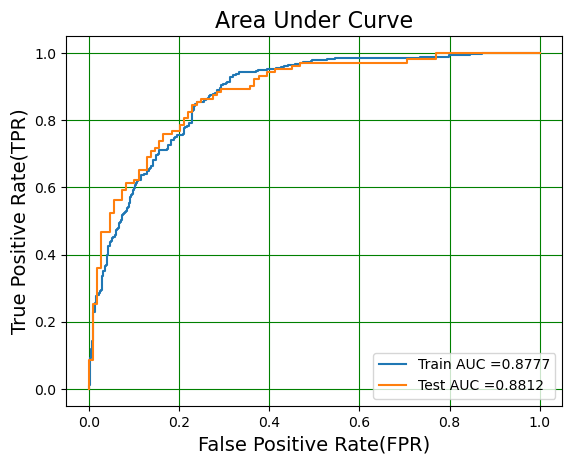

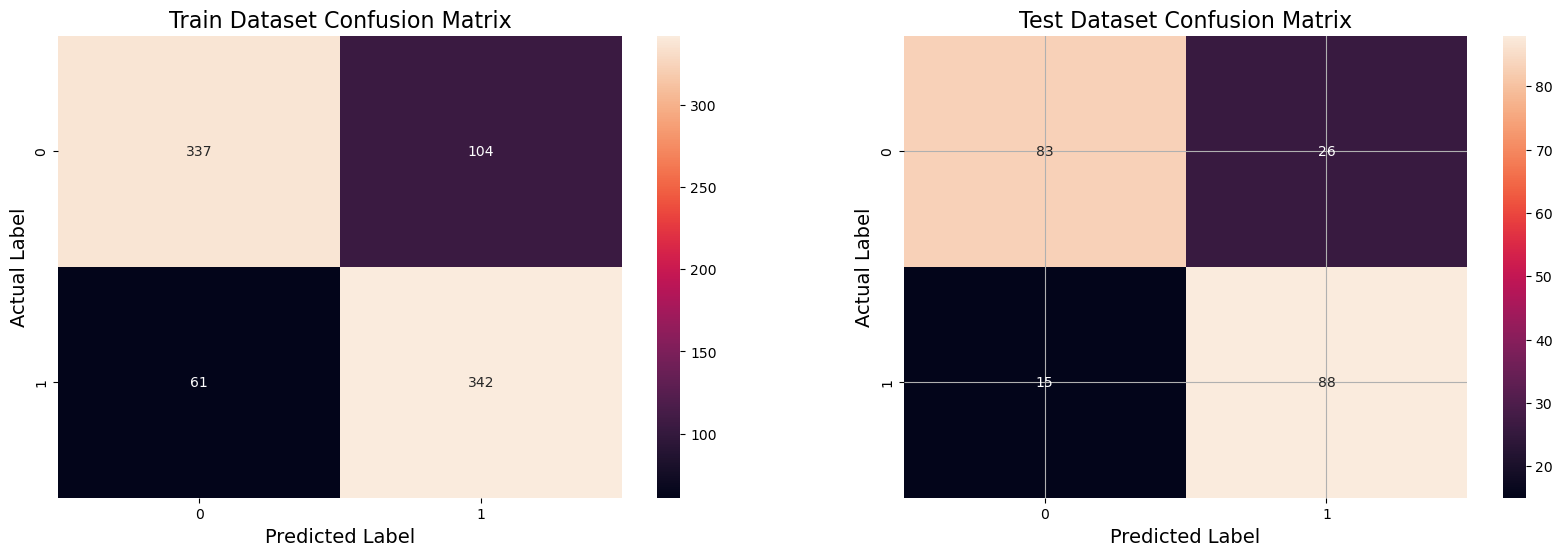

Best Threshold = 0.4415
Model AUC is : 0.8812
Model F1 Score is : 0.8111


In [150]:
# Validate LogisticRegression model
test_auc, test_f1_score, best_t = validate_model(log_reg, X_train_const, X_test_const, y_train_const, y_test_const)

print("Best Threshold = {:.4f}".format(best_t))
print("Model AUC is : {:.4f}".format(test_auc))
print("Model F1 Score is : {:.4f}".format(test_f1_score))

In [151]:
#Predict the response for test dataset
y_pred = log_reg.predict(X_test_const)

In [152]:
# convert probabilities to 0 and 1 using 'if_else'
y_pred_Log_cv = [ 0 if x < 0.37 else 1 for x in y_pred]

In [153]:
acc_table = classification_report(y_test_const, y_pred_Log_cv)
print(acc_table)

              precision    recall  f1-score   support

           0       0.82      0.78      0.80       109
           1       0.78      0.82      0.80       103

    accuracy                           0.80       212
   macro avg       0.80      0.80      0.80       212
weighted avg       0.80      0.80      0.80       212



In [154]:
update_score_card(algorithm_name = 'Log Reg Grid Search CV ', model = log_reg,cutoff = 0.37)
score_card

,Model_Name,Probability Cutoff,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Linear Regression,0.50,0.797675,0.777778,0.815534,0.79717,0.594556,0.796209
1,Log Reg (cutoff),0.19,0.797675,0.777778,0.815534,0.79717,0.594556,0.796209
2,Log Reg Grid Search CV,0.37,0.797675,0.777778,0.815534,0.79717,0.594556,0.796209


In [155]:
print("roc_auc_score:",metrics.roc_auc_score(y_test_const, y_pred))
print("cohen_kappa_score:",metrics.cohen_kappa_score(y_test_const, y_pred))

roc_auc_score: 0.7976752471719961
cohen_kappa_score: 0.5945561288027041


### 5. Base Decision Tree 

In [157]:
X.head()

,Age,provider_InscClaimAmtReimbursed_mean,provider_DeductibleAmtPaid_mean,provider_NoOfMonths_PartACov_mean,provider_NoOfMonths_PartBCov_mean,provider_IPAnnualReimbursementAmt_mean,provider_IPAnnualDeductibleAmt_mean,provider_OPAnnualReimbursementAmt_mean,provider_OPAnnualDeductibleAmt_mean,provider_InscClaimAmtReimbursed_std,...,diag1_OPAnnualReimbursementAmt_mean,diag1_OPAnnualDeductibleAmt_mean,diag1_InscClaimAmtReimbursed_std,diag1_DeductibleAmtPaid_std,diag1_NoOfMonths_PartACov_std,diag1_NoOfMonths_PartBCov_std,diag1_IPAnnualReimbursementAmt_std,diag1_IPAnnualDeductibleAmt_std,diag1_OPAnnualReimbursementAmt_std,diag1_OPAnnualDeductibleAmt_std
0,0.243299,-0.087373,-0.148123,-0.188438,0.202527,-0.023400,-0.092097,-0.003928,-0.108470,0.707628,...,0.399340,0.374055,-0.098899,-0.132451,-0.212738,-0.079609,0.270151,0.056819,0.293175,0.229534
1,-0.980484,-0.357368,-0.483199,0.202919,0.223299,-0.376175,-0.118205,-0.277906,-0.281549,-0.393278,...,-0.647653,-0.622967,-0.731224,-0.889337,-0.315843,0.418387,-0.205604,-1.051011,-0.878126,-1.070671
2,1.087915,-0.431331,-0.509046,0.202919,0.223299,-0.499007,-0.335874,1.252836,0.700156,-0.543407,...,1.327160,1.323393,-0.522668,-0.405155,-1.055415,-0.963137,-0.772193,-0.015133,0.663654,0.975467
3,0.693774,-0.432310,-0.509046,0.202919,-0.134450,-0.993311,-0.994323,0.533431,-0.291883,-0.522882,...,-0.353130,-0.426695,-0.495410,-0.509926,0.230845,0.397668,-0.475808,-0.430751,-0.441476,-0.562164
4,-0.367376,-0.413495,-0.509046,0.202919,0.223299,0.859816,0.643637,-0.921851,-0.288008,-0.664323,...,-0.670402,-0.883293,-0.772120,0.054534,-3.333541,3.450361,-2.176429,-1.270221,-0.174804,0.286639


In [158]:
# y = df_final_num.PotentialFraud

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 10)

print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (844, 49)
y_train (844,)
X_test (212, 49)
y_test (212,)


In [159]:
X_train.head()

,Age,provider_InscClaimAmtReimbursed_mean,provider_DeductibleAmtPaid_mean,provider_NoOfMonths_PartACov_mean,provider_NoOfMonths_PartBCov_mean,provider_IPAnnualReimbursementAmt_mean,provider_IPAnnualDeductibleAmt_mean,provider_OPAnnualReimbursementAmt_mean,provider_OPAnnualDeductibleAmt_mean,provider_InscClaimAmtReimbursed_std,...,diag1_OPAnnualReimbursementAmt_mean,diag1_OPAnnualDeductibleAmt_mean,diag1_InscClaimAmtReimbursed_std,diag1_DeductibleAmtPaid_std,diag1_NoOfMonths_PartACov_std,diag1_NoOfMonths_PartBCov_std,diag1_IPAnnualReimbursementAmt_std,diag1_IPAnnualDeductibleAmt_std,diag1_OPAnnualReimbursementAmt_std,diag1_OPAnnualDeductibleAmt_std
989,-0.505494,-0.007803,-0.046222,0.202919,0.223299,0.805258,0.313669,-0.040605,-0.412567,0.579485,...,-0.085501,-0.219607,-0.023391,0.199794,-0.403594,-0.421656,-0.062095,0.240582,-0.355956,-0.359642
802,-0.104673,-0.283278,-0.368652,0.101528,-0.551654,0.171783,-0.145178,0.726154,0.594478,0.125486,...,0.532671,0.516481,-0.269785,-0.281588,0.097743,-0.029030,-0.126642,0.059044,0.298362,0.314415
924,0.318896,-0.415042,-0.499761,0.067267,0.147062,-0.394752,-0.276092,0.328773,0.330701,-0.506688,...,0.247880,0.249295,-0.365604,-0.365348,0.119446,-0.011822,-0.180609,-0.101994,-0.019611,0.026014
504,0.460839,2.356540,3.040149,0.202919,0.223299,1.856722,2.090960,0.577174,0.385418,2.013822,...,0.397603,0.333267,2.684760,2.543166,0.731084,0.844425,2.295297,1.912860,1.519367,1.290067
661,-0.592363,0.185941,0.155815,0.120049,0.038560,0.112411,0.032824,-0.042520,-0.079322,1.281027,...,0.127133,0.099881,0.241815,0.225234,0.169910,0.086788,0.189606,-0.046682,0.175320,0.178941


#### Create a generalized function to create a dataframe containing the scores for the models.


In [160]:
score_card = pd.DataFrame(columns=['Model_Name', 'AUC Score', 'Precision Score', 'Recall Score',
                                       'Accuracy Score', 'Kappa Score', 'f1-score'])

def update_score_card(algorithm_name,model):
    
    # let 'y_pred_prob' be the predicted values of y
    y_pred_prob = model.predict(X_test)

    # convert probabilities to 0 and 1 using 'if_else'
    y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]
    
    # assign 'score_card' as global variable
    global score_card

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card = score_card.append({'Model_Name': algorithm_name,
                                  
                                    'AUC Score' : metrics.roc_auc_score(y_test, y_pred),
                                    'Precision Score': metrics.precision_score(y_test, y_pred),
                                    'Recall Score': metrics.recall_score(y_test, y_pred),
                                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                                    'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred),
                                    'f1-score': metrics.f1_score(y_test, y_pred)}, 
                                    ignore_index = True)

#### Create a generalized function to calculate the metrics for the train and the test set.

In [161]:
# create a generalized function to calculate the metrics values for train set
def get_train_report(model):
    
    # for training set:
    # train_pred: prediction made by the model on the train dataset 'X_train'
    # y_train: actual values of the target variable for the train dataset

    # predict the output of the target variable from the train data 
    train_pred = model.predict(X_train)

    # return the performace measures on train set
    return(classification_report(y_train, train_pred))

In [162]:
# create a generalized function to calculate the metrics values for test set
def get_test_report(model):
    
    # for test set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data 
    test_pred = model.predict(X_test)

    # return the performace measures on test set
    return(classification_report(y_test, test_pred))

### Over-fitting in Decision Tree

In [163]:
# Build a full decision tree model on a train dataset using 'gini'.
decision_tree_classification = DecisionTreeClassifier(criterion = 'gini', random_state = 10)
decision_tree = decision_tree_classification.fit(X_train, y_train)

In [164]:
train_report = get_train_report(decision_tree)
print(train_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       441
           1       1.00      1.00      1.00       403

    accuracy                           1.00       844
   macro avg       1.00      1.00      1.00       844
weighted avg       1.00      1.00      1.00       844



In [165]:
y_pred = decision_tree.predict(X_test)
y_pred_dtrcv = [ 0 if x < 0.5 else 1 for x in y_pred]

In [166]:
print("roc_auc_score:",metrics.roc_auc_score(y_test, y_pred_dtrcv))
print("cohen_kappa_score:",metrics.cohen_kappa_score(y_test, y_pred_dtrcv))

roc_auc_score: 0.7534515008461745
cohen_kappa_score: 0.5079889315361956


In [167]:
update_score_card(algorithm_name = 'Bayes Decision Tree ', model = decision_tree)
score_card

,Model_Name,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Bayes Decision Tree,0.753452,0.768421,0.708738,0.754717,0.507989,0.737374


In [168]:
# Interpretation: From the above output, we can see that there is a difference between the train and test accuracy; 
# thus, we can conclude that the decision tree is over-fitted on the train data.

# If we tune the hyperparameters in the decision tree, it helps to avoid the over-fitting of the tree.

### 6. Decision Tree (basic tuning)

#### Build a decision tree using 'criterion = gini', 'max_depth = 70', 'min_samples_split = 60', 'max_leaf_nodes = 85'

In [169]:
# pass the criteria 'gini' to the parameter, 'criterion' 
# max_depth: that assigns maximum depth of the tree
# min_samples_split: assigns minimum number of samples to split an internal node
# max_leaf_nodes': assigns maximum number of leaf nodes in the tree
# pass the 'random_state' to obtain the same samples for each time you run the code

dt_model = DecisionTreeClassifier(criterion = 'gini',
                                  max_depth = 70,
                                  min_samples_split = 60,
                                  max_leaf_nodes = 85,
                                  random_state = 10)

# fit the model using fit() on train data
decision_tree1 = dt_model.fit(X_train, y_train)

# compute the performance measures on train data
# call the function 'get_train_report'
# pass the decision tree to the function
train_report = get_train_report(decision_tree1)


# compute the performance measures on test data
# call the function 'get_test_report'
# pass the decision tree to the function
test_report = get_test_report(decision_tree1)


# print the performance measures
print('Test data:\n', test_report)

Test data:
               precision    recall  f1-score   support

           0       0.72      0.86      0.78       109
           1       0.81      0.64      0.72       103

    accuracy                           0.75       212
   macro avg       0.77      0.75      0.75       212
weighted avg       0.76      0.75      0.75       212



Train AUC =  0.9395463727260962
Test AUC =  0.8550814999554646


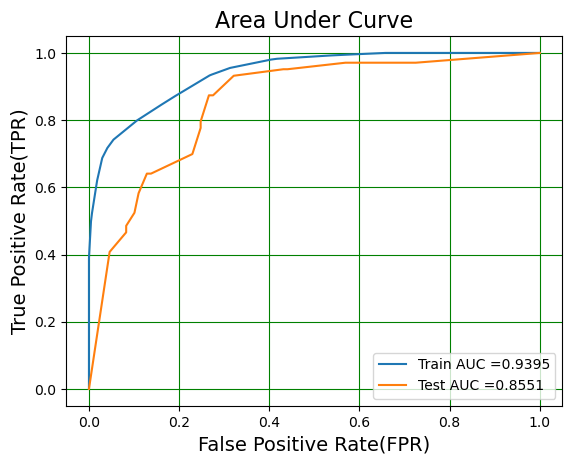

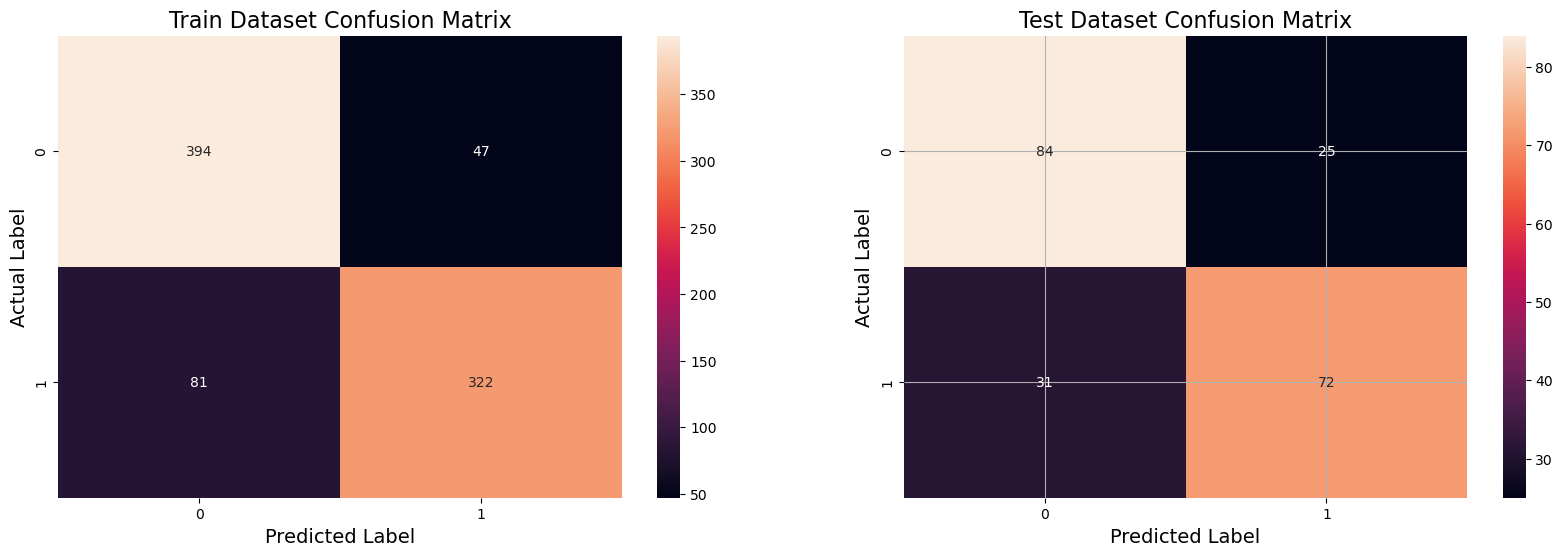

Best Threshold = 0.5000
Model AUC is : 0.8551
Model F1 Score is : 0.7200


In [170]:
test_auc, test_f1_score, best_t = validate_model(decision_tree1, X_train, X_test, y_train, y_test)

print("Best Threshold = {:.4f}".format(best_t))
print("Model AUC is : {:.4f}".format(test_auc))
print("Model F1 Score is : {:.4f}".format(test_f1_score))

In [171]:
y_pred = decision_tree1.predict(X_test)
y_pred_dt1 = [ 0 if x < 0.5 else 1 for x in y_pred]

In [172]:
update_score_card(algorithm_name = 'Decision Tree (tuning) ', model = decision_tree1)
score_card

,Model_Name,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Bayes Decision Tree,0.753452,0.768421,0.708738,0.754717,0.507989,0.737374
1,Decision Tree (tuning),0.751581,0.814815,0.640777,0.754717,0.506137,0.717391


In [173]:
print("roc_auc_score:",metrics.roc_auc_score(y_test, y_pred_dt1))
print("cohen_kappa_score:",metrics.cohen_kappa_score(y_test, y_pred_dt1))

roc_auc_score: 0.7515810100650218
cohen_kappa_score: 0.5061374428814622


### 7. Decision Tree - RandomizedSearchCV

In [174]:
decisiontree = DecisionTreeClassifier() #class_weight = 'balanced'

parameters = {'criterion':['gini','entropy'], 'max_depth': [5, 10, 50, 100, 150, 200, 250, 500], 
              'min_samples_split': [5, 10, 50, 100, 150, 200, 250, 500]}

decisiontree_cv = RandomizedSearchCV(decisiontree, parameters, cv=5, scoring='roc_auc', n_jobs=-1, return_train_score=True)
decisiontree_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 50, 100, 150, 200,
                                                      250, 500],
                                        'min_samples_split': [5, 10, 50, 100,
                                                              150, 200, 250,
                                                              500]},
                   return_train_score=True, scoring='roc_auc')

In [175]:
print("best parameters = ",decisiontree_cv.best_params_)
print("roc_auc_score :",decisiontree_cv.best_score_)

best parameters =  {'min_samples_split': 100, 'max_depth': 50, 'criterion': 'gini'}
roc_auc_score : 0.8463818920320559


In [176]:
dt_model1 = DecisionTreeClassifier(criterion = 'gini',
                                  max_depth = 50,
                                  min_samples_split = 250,
                                  max_leaf_nodes = 200,
                                  random_state = 10)

decision_tree2 = dt_model1.fit(X_train, y_train)

train_report = get_train_report(decision_tree2)
test_report = get_test_report(decision_tree2)
print('Test data:\n', test_report)

Test data:
               precision    recall  f1-score   support

           0       0.73      0.71      0.72       109
           1       0.70      0.72      0.71       103

    accuracy                           0.71       212
   macro avg       0.71      0.71      0.71       212
weighted avg       0.71      0.71      0.71       212



In [177]:
dt_model1 = DecisionTreeClassifier(criterion = 'entropy',
                                  max_depth = 50,
                                  min_samples_split = 200,
                                  max_leaf_nodes = 120,
                                  random_state = 10)

decision_tree2 = dt_model1.fit(X_train, y_train)

train_report = get_train_report(decision_tree2)
test_report = get_test_report(decision_tree2)
print('Test data:\n', test_report)

Test data:
               precision    recall  f1-score   support

           0       0.79      0.64      0.71       109
           1       0.68      0.82      0.74       103

    accuracy                           0.73       212
   macro avg       0.73      0.73      0.73       212
weighted avg       0.74      0.73      0.72       212



In [178]:
#Predict the response for test dataset
y_pred = decisiontree_cv.predict(X_test)

In [179]:
update_score_card(algorithm_name = 'Decision Tree RandomizedSearchCV ', model = decision_tree2)
score_card

,Model_Name,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Bayes Decision Tree,0.753452,0.768421,0.708738,0.754717,0.507989,0.737374
1,Decision Tree (tuning),0.751581,0.814815,0.640777,0.754717,0.506137,0.717391
2,Decision Tree RandomizedSearchCV,0.728868,0.682927,0.815534,0.726415,0.455303,0.743363


In [180]:
# convert probabilities to 0 and 1 using 'if_else'
y_pred_prob = [ 0 if x < 0.5 else 1 for x in y_pred]

Train AUC =  0.921872802057134
Test AUC =  0.8331255010243164


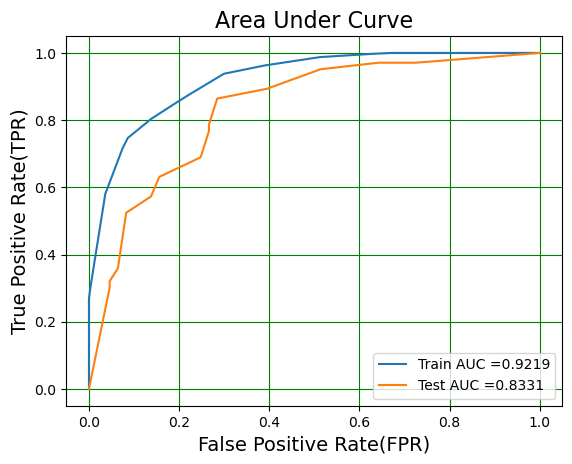

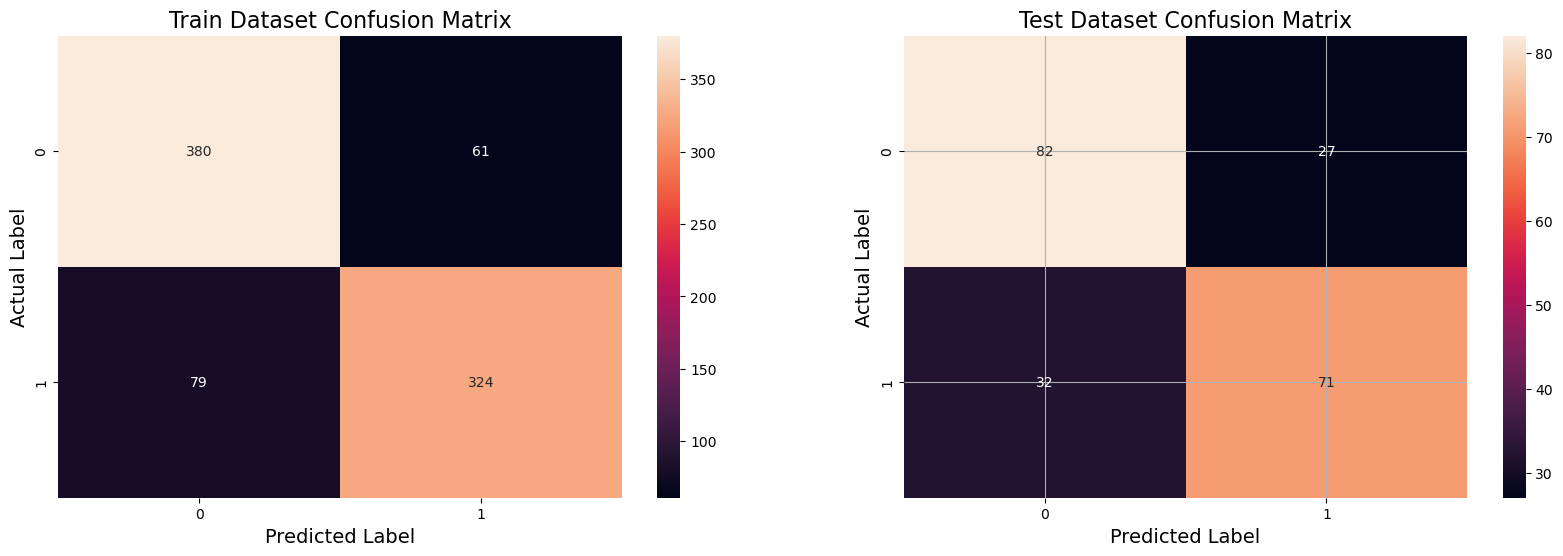

Best Threshold = 0.5000
Model AUC is : 0.8331
Model F1 Score is : 0.7065


In [181]:

test_auc, test_f1_score, best_t = validate_model(decisiontree_cv, X_train, X_test, y_train, y_test)

print("Best Threshold = {:.4f}".format(best_t))
print("Model AUC is : {:.4f}".format(test_auc))
print("Model F1 Score is : {:.4f}".format(test_f1_score))

In [182]:
print("roc_auc_score:",metrics.roc_auc_score(y_test, y_pred_prob))
print("cohen_kappa_score:",metrics.cohen_kappa_score(y_test, y_pred_prob))

roc_auc_score: 0.7375523292063776
cohen_kappa_score: 0.47778573987817985


In [183]:
acc_table = classification_report(y_test, y_pred_prob)

# print the table
print(acc_table)

              precision    recall  f1-score   support

           0       0.71      0.84      0.77       109
           1       0.79      0.63      0.70       103

    accuracy                           0.74       212
   macro avg       0.75      0.74      0.74       212
weighted avg       0.75      0.74      0.74       212



### 8. Decision Tree - GridSearchCV 

In [184]:
# create a dictionary with hyperparameters and its values
# pass the criteria 'entropy' and 'gini' to the parameter, 'criterion' 
# pass the range of values to 'max_depth' that assigns maximum depth of the tree
# 'max_features' assigns maximum number of features to consider for the best split. We pass the string 'sqrt' and 'log2'
# 'sqrt' considers maximum number of features equal to the square root of total features
# 'log2' considers maximum number of features equal to the log of total features with base 2
# pass the range of values to 'min_samples_split' that assigns minimum number of samples to split an internal node
# pass the range of values to 'min_samples_leaf' that assigns minimum number of samples required at the terminal/leaf node
# pass the range of values to 'max_leaf_nodes' that assigns maximum number of leaf nodes in the tree

decisiontree = DecisionTreeClassifier() #class_weight = 'balanced'

parameters = {'criterion':['gini','entropy'], 'max_depth': [5, 10, 50, 100, 150, 200, 250, 500], 'min_samples_split': [5, 10, 50, 100, 150, 200, 250, 500]}

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the decision tree classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 5
decisiontree_gs = GridSearchCV(decisiontree, parameters, cv=5, scoring='roc_auc', n_jobs=-1, return_train_score=True)


# fit the model on X_train and y_train using fit()
decisiontree_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 50, 100, 150, 200, 250, 500],
                         'min_samples_split': [5, 10, 50, 100, 150, 200, 250,
                                               500]},
             return_train_score=True, scoring='roc_auc')

In [185]:
print("best parameters = ",decisiontree_gs.best_params_)
print("roc_auc_score :",decisiontree_gs.best_score_)

best parameters =  {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 50}
roc_auc_score : 0.8478236189138576


In [186]:
dt_model1 = DecisionTreeClassifier(criterion = 'gini',
                                  max_depth = 250,
                                  min_samples_split = 250,
                                  max_leaf_nodes = 300,
                                  random_state = 10)

decision_tree2 = dt_model1.fit(X_train, y_train)

train_report = get_train_report(decision_tree2)
test_report = get_test_report(decision_tree2)
print('Test data:\n', test_report)

Test data:
               precision    recall  f1-score   support

           0       0.73      0.71      0.72       109
           1       0.70      0.72      0.71       103

    accuracy                           0.71       212
   macro avg       0.71      0.71      0.71       212
weighted avg       0.71      0.71      0.71       212



In [187]:
#Predict the response for test dataset
y_pred = decisiontree_gs.predict(X_test)

In [188]:
# convert probabilities to 0 and 1 using 'if_else'
y_pred_prob = [ 0 if x < 0.5 else 1 for x in y_pred]

In [189]:
acc_table = classification_report(y_test, y_pred_prob)
print(acc_table)

              precision    recall  f1-score   support

           0       0.76      0.82      0.79       109
           1       0.79      0.73      0.76       103

    accuracy                           0.77       212
   macro avg       0.78      0.77      0.77       212
weighted avg       0.77      0.77      0.77       212



In [190]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_prob))
print("roc_auc_score:",metrics.roc_auc_score(y_test, y_pred_prob))
print("cohen_kappa_score:",metrics.cohen_kappa_score(y_test, y_pred_prob))

Accuracy: 0.7735849056603774
roc_auc_score: 0.7723345506368576
cohen_kappa_score: 0.5458359368026422


###  Base Random Forest Model

In [191]:
rf_classification = RandomForestClassifier(n_estimators = 10, random_state = 10)
# use fit() to fit the model on the train set
rf_model = rf_classification.fit(X_train, y_train)

In [192]:
# Calculate performance measures on the test set.
test_report = get_test_report(rf_model)
print(test_report) 

              precision    recall  f1-score   support

           0       0.79      0.80      0.79       109
           1       0.78      0.78      0.78       103

    accuracy                           0.79       212
   macro avg       0.79      0.79      0.79       212
weighted avg       0.79      0.79      0.79       212



In [193]:
train_report = get_train_report(rf_model)

# print the performace measures
print(train_report) 

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       441
           1       1.00      0.99      0.99       403

    accuracy                           0.99       844
   macro avg       0.99      0.99      0.99       844
weighted avg       0.99      0.99      0.99       844



### 9. Random Forest (tuning)

In [194]:
rf_model = RandomForestClassifier(criterion = 'gini',
                                  max_depth = 50,
                                  min_samples_split = 30,
                                  max_leaf_nodes = 65,
                                  random_state = 10)
random_forest = rf_model.fit(X_train, y_train)

train_report = get_train_report(random_forest)
print('Train data:\n', train_report)

test_report = get_test_report(random_forest)
print('Test data:\n', test_report)

Train data:
               precision    recall  f1-score   support

           0       0.94      0.90      0.92       441
           1       0.89      0.94      0.91       403

    accuracy                           0.92       844
   macro avg       0.92      0.92      0.92       844
weighted avg       0.92      0.92      0.92       844

Test data:
               precision    recall  f1-score   support

           0       0.83      0.79      0.81       109
           1       0.79      0.83      0.81       103

    accuracy                           0.81       212
   macro avg       0.81      0.81      0.81       212
weighted avg       0.81      0.81      0.81       212



In [195]:
y_pred = random_forest.predict(X_test)
y_pred_prob = [ 0 if x < 0.5 else 1 for x in y_pred]


acc_table = classification_report(y_test, y_pred_prob)
print(acc_table)

print("roc_auc_score:",metrics.roc_auc_score(y_test, y_pred_prob))
print("cohen_kappa_score:",metrics.cohen_kappa_score(y_test, y_pred_prob))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       109
           1       0.79      0.83      0.81       103

    accuracy                           0.81       212
   macro avg       0.81      0.81      0.81       212
weighted avg       0.81      0.81      0.81       212

roc_auc_score: 0.8071167720673376
cohen_kappa_score: 0.6134139832769969


### 10. Random Forest - RandomizedSearchCV

In [197]:
randomforest = RandomForestClassifier() #class_weight = 'balanced'

parameters = {'criterion':['gini','entropy'], 'max_depth': [5, 10, 50, 100, 150, 200, 250, 500], 'min_samples_split': [5, 10, 50, 100, 150, 200, 250, 500]}

randomforest_rc = RandomizedSearchCV(randomforest, parameters, cv=5, scoring='roc_auc', n_jobs=-1, return_train_score=True)
randomforest_rc.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 50, 100, 150, 200,
                                                      250, 500],
                                        'min_samples_split': [5, 10, 50, 100,
                                                              150, 200, 250,
                                                              500]},
                   return_train_score=True, scoring='roc_auc')

In [198]:
print("best parameters = ",randomforest_rc.best_params_)
print("roc_auc_score :",randomforest_rc.best_score_)


best parameters =  {'min_samples_split': 10, 'max_depth': 10, 'criterion': 'gini'}
roc_auc_score : 0.8942847994615317


In [199]:
rf_model1 = RandomForestClassifier(criterion = 'gini',
                                  max_depth = 50,
                                  min_samples_split = 250,
                                  max_leaf_nodes = 200,
                                  random_state = 10)

random_forest2 = rf_model1.fit(X_train, y_train)

train_report = get_train_report(random_forest2)
test_report = get_test_report(random_forest2)
print('Test data:\n', test_report)

Test data:
               precision    recall  f1-score   support

           0       0.83      0.79      0.81       109
           1       0.79      0.83      0.81       103

    accuracy                           0.81       212
   macro avg       0.81      0.81      0.81       212
weighted avg       0.81      0.81      0.81       212



 ## Random Forest - GridSearchCV 

In [200]:
randomforest1 = RandomForestClassifier() #class_weight = 'balanced'

parameters = {'criterion':['gini','entropy'], 'max_depth': [5, 10, 50, 100, 150, 200, 250, 500], 'min_samples_split': [5, 10, 50, 100, 150, 200, 250, 500]}

randomforest_gc = GridSearchCV(randomforest1, parameters, cv=5, scoring='roc_auc', n_jobs=-1, return_train_score=True)
randomforest_gc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 50, 100, 150, 200, 250, 500],
                         'min_samples_split': [5, 10, 50, 100, 150, 200, 250,
                                               500]},
             return_train_score=True, scoring='roc_auc')

In [201]:
print("best parameters = ",randomforest_gc.best_params_)
print("roc_auc_score :",randomforest_gc.best_score_)

best parameters =  {'criterion': 'gini', 'max_depth': 500, 'min_samples_split': 10}
roc_auc_score : 0.899909066476248


In [202]:
train_report = get_train_report(randomforest_gc)
test_report = get_test_report(randomforest_gc)
print('Test data:\n', test_report)
print("cohen_kappa_score:",metrics.cohen_kappa_score(y_test, y_pred))

Test data:
               precision    recall  f1-score   support

           0       0.83      0.77      0.80       109
           1       0.77      0.83      0.80       103

    accuracy                           0.80       212
   macro avg       0.80      0.80      0.80       212
weighted avg       0.80      0.80      0.80       212

cohen_kappa_score: 0.6134139832769969


## 12. AdaBoost

### AdaBoost

In [203]:
ada_model = AdaBoostClassifier(n_estimators = 40, 
                               random_state = 10)
ada_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=40, random_state=10)

In [204]:
# Predict the response for test dataset
y_pred = ada_model.predict(X_test)
# convert probabilities to 0 and 1 using 'if_else'
y_pred_prob = [ 0 if x < 0.5 else 1 for x in y_pred]
acc_table = classification_report(y_test, y_pred_prob)
print(acc_table)

              precision    recall  f1-score   support

           0       0.81      0.80      0.80       109
           1       0.79      0.80      0.79       103

    accuracy                           0.80       212
   macro avg       0.80      0.80      0.80       212
weighted avg       0.80      0.80      0.80       212



In [205]:
print("roc_auc_score:",metrics.roc_auc_score(y_test, y_pred))
print("cohen_kappa_score:",metrics.cohen_kappa_score(y_test, y_pred))

roc_auc_score: 0.7971408212345239
cohen_kappa_score: 0.5941228851291185


In [206]:
test_report = get_test_report(ada_model)
print(test_report)

              precision    recall  f1-score   support

           0       0.81      0.80      0.80       109
           1       0.79      0.80      0.79       103

    accuracy                           0.80       212
   macro avg       0.80      0.80      0.80       212
weighted avg       0.80      0.80      0.80       212



## 13. Gradient Boosting

In [207]:
gboost_model = GradientBoostingClassifier(n_estimators = 150, max_depth = 10, random_state = 10)

# fit the model using fit() on train data
gboost_model.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=10, n_estimators=150, random_state=10)

In [208]:
#Predict the response for test dataset
y_pred = gboost_model.predict(X_test)


# convert probabilities to 0 and 1 using 'if_else'
y_pred_prob = [ 0 if x < 0.5 else 1 for x in y_pred]


acc_table = classification_report(y_test, y_pred_prob)

# print the table
print(acc_table)

print("roc_auc_score:",metrics.roc_auc_score(y_test, y_pred))
print("cohen_kappa_score:",metrics.cohen_kappa_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.78      0.76       109
           1       0.76      0.72      0.74       103

    accuracy                           0.75       212
   macro avg       0.75      0.75      0.75       212
weighted avg       0.75      0.75      0.75       212

roc_auc_score: 0.7491315578516078
cohen_kappa_score: 0.49892971815911524


## 14. XGBoost

In [209]:
# pass the value of minimum loss reduction required for partition of the leaf node to the parameter, 'gamma'
xgb_modelf = XGBClassifier(max_depth = 10, gamma = 1)

# fit the model using fit() on train data
xgb_modelf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=1, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [210]:
#Predict the response for test dataset
y_pred = xgb_modelf.predict(X_test)


# convert probabilities to 0 and 1 using 'if_else'
y_pred_prob = [ 0 if x < 0.7 else 1 for x in y_pred]


acc_table = classification_report(y_test, y_pred_prob)

# print the table
print(acc_table)

print("roc_auc_score:",metrics.roc_auc_score(y_test, y_pred))
print("cohen_kappa_score:",metrics.cohen_kappa_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79       109
           1       0.77      0.80      0.78       103

    accuracy                           0.79       212
   macro avg       0.79      0.79      0.79       212
weighted avg       0.79      0.79      0.79       212

roc_auc_score: 0.7879665093079185
cohen_kappa_score: 0.5754716981132075


In [211]:
# pass the value of minimum loss reduction required for partition of the leaf node to the parameter, 'gamma'
xgb_model = XGBClassifier(max_depth = 10, gamma = 1)

# fit the model using fit() on train data
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=1, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

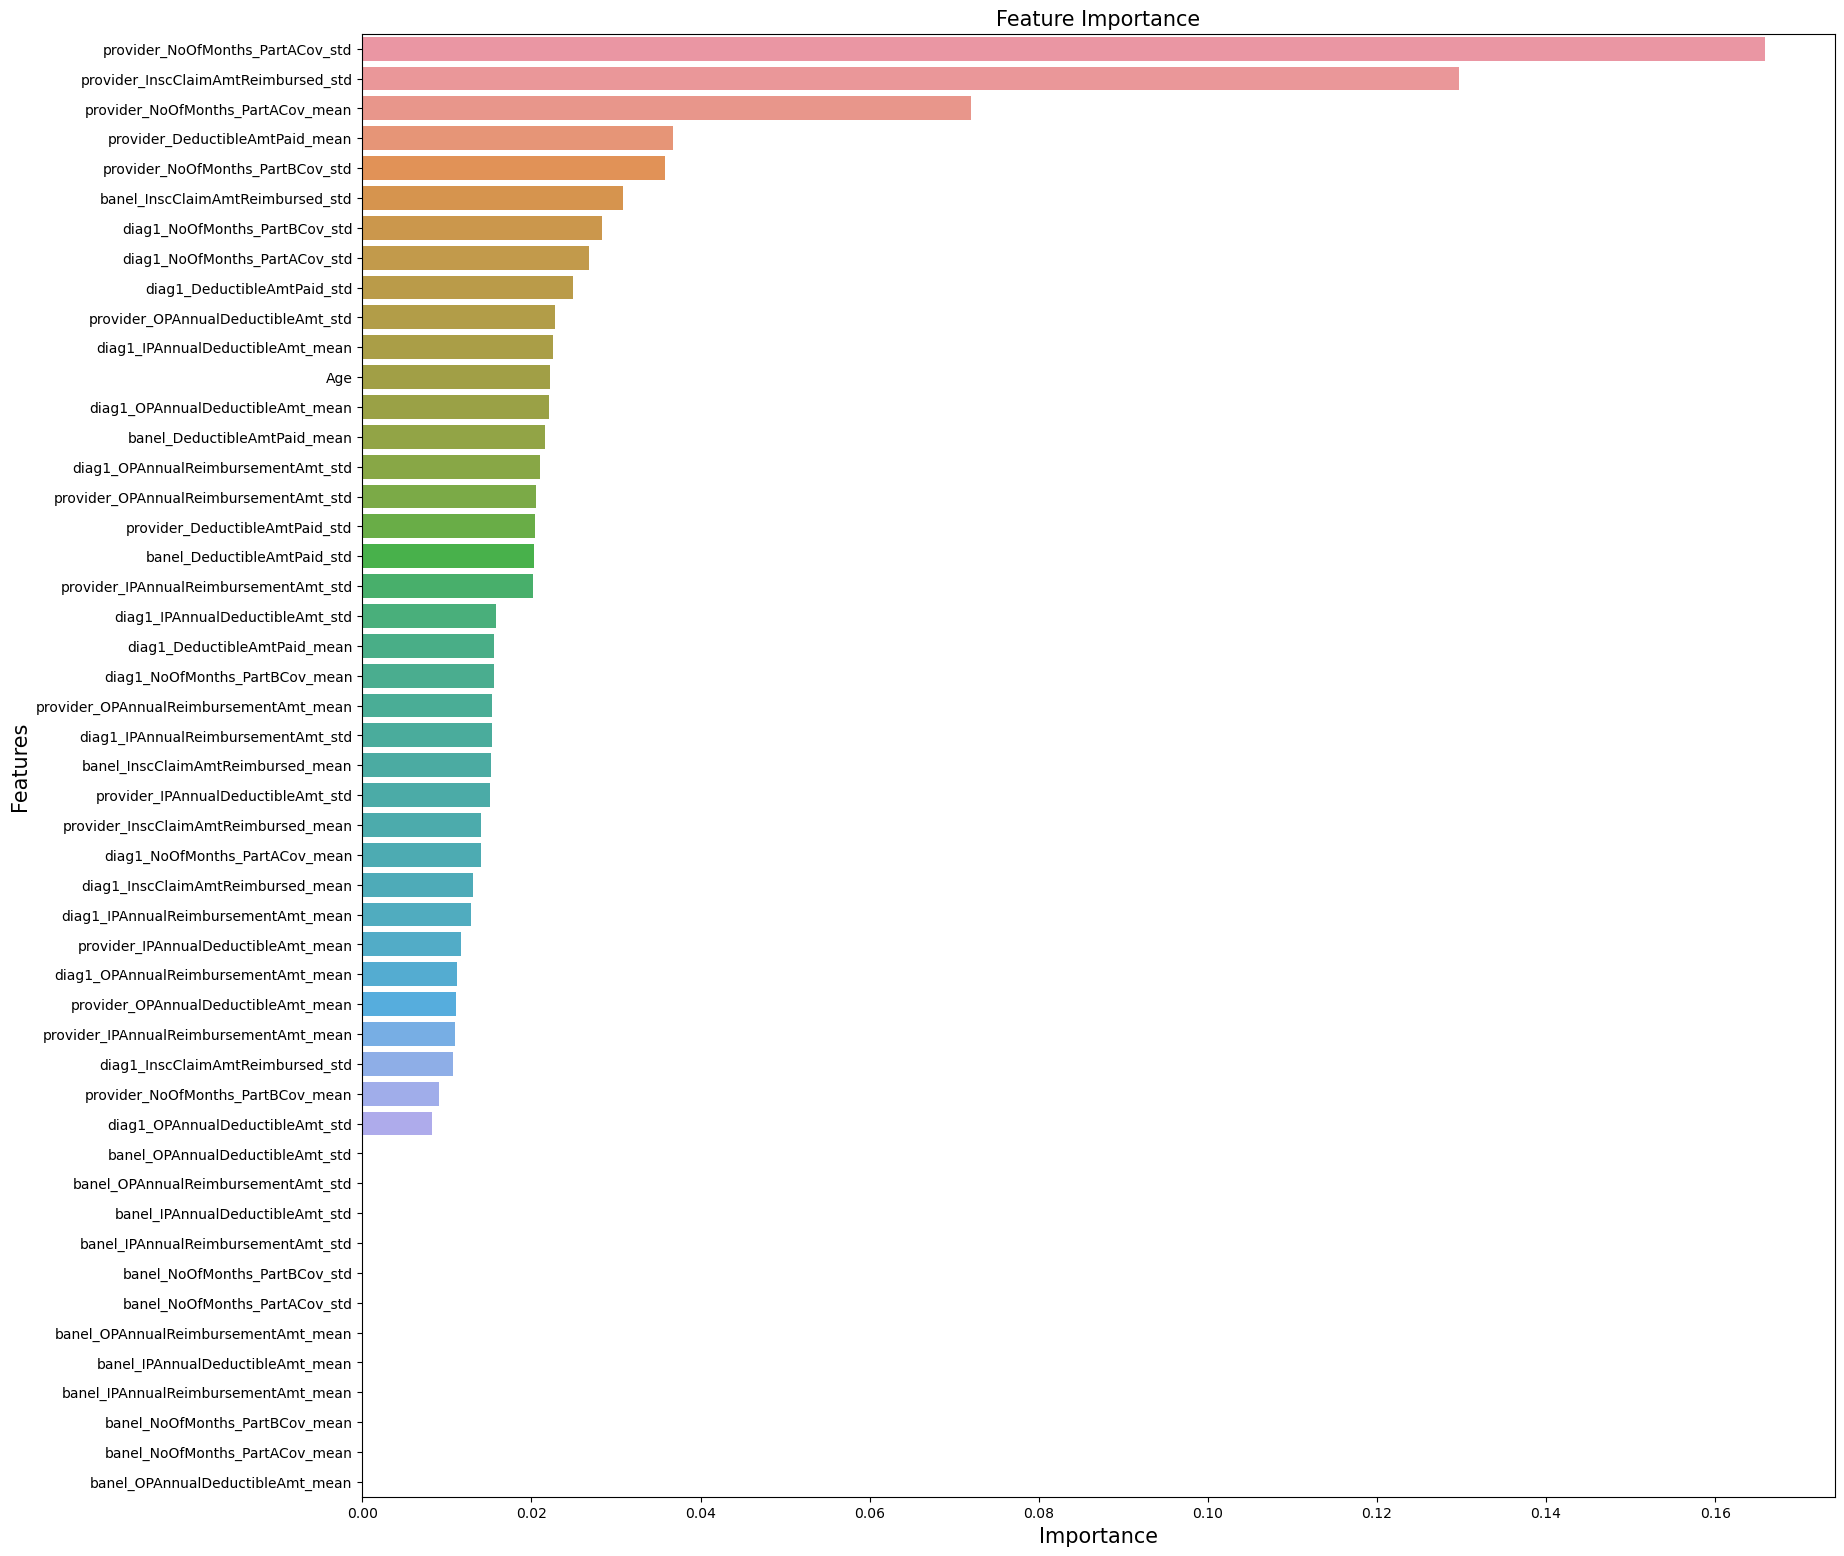

In [212]:
xgboost_tuned_model = XGBClassifier(max_depth = 15, n_estimators = 90,random_state = 10)
xgboost_tuned_model = xgboost_tuned_model.fit(X_train, y_train)
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': xgboost_tuned_model.feature_importances_})
important_features =important_features.sort_values('Importance', ascending = False)
plt.figure(figsize=(19,19))
sns.barplot(x = 'Importance', y = 'Features', data = important_features)
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)
plt.show()

In [213]:
## 15. knn model on a training dataset using euclidean distance (Standardized Data)

In [214]:
from sklearn.neighbors import KNeighborsClassifier

In [215]:
knn_classification = KNeighborsClassifier(n_neighbors = 3)

# fit the model using fit() on train data
knn_model = knn_classification.fit(X_train, y_train)

In [216]:
#Predict the response for test dataset
y_pred = knn_model.predict(X_test)


# convert probabilities to 0 and 1 using 'if_else'
y_pred_prob = [ 0 if x < 0.5 else 1 for x in y_pred]


acc_table = classification_report(y_test, y_pred_prob)

# print the table
print(acc_table)

print("roc_auc_score:",metrics.roc_auc_score(y_test, y_pred))
print("cohen_kappa_score:",metrics.cohen_kappa_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.64      0.72       109
           1       0.69      0.84      0.76       103

    accuracy                           0.74       212
   macro avg       0.75      0.74      0.74       212
weighted avg       0.75      0.74      0.74       212

roc_auc_score: 0.7434310145185712
cohen_kappa_score: 0.4838881019830028


In [217]:
test_report = get_test_report(knn_model)

# print the performace measures
print(test_report)

              precision    recall  f1-score   support

           0       0.81      0.64      0.72       109
           1       0.69      0.84      0.76       103

    accuracy                           0.74       212
   macro avg       0.75      0.74      0.74       212
weighted avg       0.75      0.74      0.74       212



In [3]:
from beautifultable import BeautifulTable
table = BeautifulTable()
table.column_headers= ["Model Name",'Accuracy','Precision ','Recall', "F1 Score"," AUC ",'Kappa']
table.append_row(["Log Reg", "0.80", "0.77","0.82", "0.80",'0.79','0.59'])
table.append_row(["Bayes Decision Tree ", "0.74", "0.76","0.68", "0.72",'0.74','0.48'])
table.append_row(["Decision Tree (basic tuning) ", "0.78", "0.80","0.74", "0.77",'0.78','0.57'])
table.append_row(["Decision Tree RandomizedSearchCV ", "0.80", "0.75","0.86", "0.81",'0.85','0.59'])
table.append_row(["Decision Tree GridSearchCV ", "0.80", "0.82","0.75", "0.78",'0.85','0.58'])
table.append_row(["Random Forest (basic tuning) ", "0.82", "0.81","0.82", "0.81",'0.81','0.63'])
table.append_row(["Random Forest GridSearchCV ", "0.80", "0.79","0.82", "0.80",'0.90','0.65'])
table.append_row(["Random Forest RandomizedSearchCV ", "0.78", "0.75","0.82", "0.78",'0.89','0.571'])
table.append_row(["AdaBoost", "0.79", "0.78","0.81", "0.79",'0.79','0.58'])
table.append_row(["Gradient Boosting", "0.75", "0.75","0.75", "0.75",'0.75','0.50'])
table.append_row(["XGBoost", "0.83", "0.80","0.85", "0.83",'0.82','0.65'])
table.append_row(["Knn", "0.77", "0.71","0.87", "0.79",'0.77','0.54'])

print(table)


+----------------------+----------+--------+--------+----------+-------+-------+
|      Model Name      | Accuracy | Precis | Recall | F1 Score |  AUC  | Kappa |
|                      |          |  ion   |        |          |       |       |
+----------------------+----------+--------+--------+----------+-------+-------+
|       Log Reg        |   0.8    |  0.77  |  0.82  |   0.8    | 0.79  | 0.59  |
+----------------------+----------+--------+--------+----------+-------+-------+
| Bayes Decision Tree  |   0.74   |  0.76  |  0.68  |   0.72   | 0.74  | 0.48  |
+----------------------+----------+--------+--------+----------+-------+-------+
| Decision Tree (basic |   0.78   |  0.8   |  0.74  |   0.77   | 0.78  | 0.57  |
|       tuning)        |          |        |        |          |       |       |
+----------------------+----------+--------+--------+----------+-------+-------+
| Decision Tree Random |   0.8    |  0.75  |  0.86  |   0.81   | 0.85  | 0.59  |
|    izedSearchCV      |    

### Selection of Model

### Results & Discussion

### Conclusion